<a href="https://colab.research.google.com/github/NhungNgo58/Sentiment-Analysis-of-Women-s-Clothes-Reviews/blob/main/Sentiment_Analysis_of_Women's_Clothes_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will focus on using Natural Language Processing (NLP) techniques to find broad trends in the written thoughts of the customers. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLTk natural Language Toolkit analysing unstructured data  
import nltk 

#testing
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import f_oneway

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
review_df = pd.read_csv('clothing_reviews.csv')
review_df.head(5)

Id  Clothing ID  Age                    Title  \
0   0          767   33                 No Title   
1   1         1080   34                 No Title   
2   2         1077   60  Some major design flaws   
3   3         1049   50         My favorite buy!   
4   4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress! it's sooo pretty. i happened ...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

# Data Information
This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers.
https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

* **Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.
* **Age:** Positive Integer variable of the reviewers age.
* **Title:** String variable for the title of the review.
* **Review Text:** String variable for the review body.
* **Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* **Recommended IND:** Binary variable stating where the customer recommends the product where **1 is recommended, 0 is not recommended.**
* **Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive. Số lượng phản hồi tích cực
* **Division Name:** Categorical name of the product high level division.
* **Department Name:**Categorical name of the product department name.
* **Class Name:** Categorical name of the product class name.

# Data Cleaning

## missing data

In [ ]:
missing = (review_df.isnull().sum()/len(review_df))*100
missing = missing.drop(missing[missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'miss_rate':missing})
missing_data.head()


Empty DataFrame
Columns: [miss_rate]
Index: []

In [ ]:
review_df = review_df.drop(columns=['Id'])
review_df.head()

Clothing ID  Age                    Title  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress! it's sooo pretty. i happened ...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

## Data format

In [ ]:
review_df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [ ]:
review_df.columns = ['Clothing ID','Age','Title Review','Review','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']
review_df.head()

Clothing ID  Age             Title Review  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                              Review  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress! it's sooo pretty. i happened ...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

## Remove Punctuation and stopwords on `Title Review` & `Review` columns

In [ ]:
import string

### Remove Stopwords 

In [ ]:
#lowercase
review_df['Review'] = review_df['Review'].str.lower()

In [ ]:
# Remove Stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
review_df['Review'] = review_df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
review_df['Title Review'] = review_df['Title Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
review_df.tail(5)

Clothing ID  Age                             Title Review  \
23481         1104   34               Great dress many occasions   
23482          862   48                         Wish made cotton   
23483         1104   31                                Cute, see   
23484         1084   28  Very cute dress, perfect summer parties   
23485         1104   52                    Please make like one!   

                                                  Review  Rating  \
23481  happy snag dress great price! easy slip flatte...       5   
23482  reminds maternity clothes. soft, stretchy, shi...       3   
23483  fit well, top see through. never would worked ...       3   
23484  bought dress wedding summer, cute. unfortunate...       3   
23485  dress lovely platinum feminine fits perfectly,...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses

### Remove Punctuation

In [ ]:
punct = string.punctuation

In [ ]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Using loop

In [ ]:
def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation,'')
    return text

In [ ]:
review_df['Review'].apply(remove_punctuations)

0            absolutely wonderful - silky sexy comfortable
1        love dress sooo pretty. happened find store, i...
2        high hopes dress really wanted work me. initia...
3        love, love, love jumpsuit. fun, flirty, fabulo...
4        shirt flattering due adjustable front tie. per...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes. soft, stretchy, shi...
23483    fit well, top see through. never would worked ...
23484    bought dress wedding summer, cute. unfortunate...
23485    dress lovely platinum feminine fits perfectly,...
Name: Review, Length: 23486, dtype: object

In [ ]:
review_df['Title Review'].apply(remove_punctuations)

0                                       No Title
1                                       No Title
2                        Some major design flaws
3                                My favorite buy
4                               Flattering shirt
                          ...                   
23481                 Great dress many occasions
23482                           Wish made cotton
23483                                  Cute, see
23484    Very cute dress, perfect summer parties
23485                       Please make like one
Name: Title Review, Length: 23486, dtype: object

#### Using replace

In [ ]:
# Remove Punctuation
review_df['Review'] = review_df['Review'].str.replace('[^\w\s]','')

<ipython-input-18-ebe068da5388>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  review_df['Review'] = review_df['Review'].str.replace('[^\w\s]','')


In [ ]:
review_df['Title Review'] = review_df['Title Review'].str.replace('[^\w\s]','')

<ipython-input-19-2909eefad717>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  review_df['Title Review'] = review_df['Title Review'].str.replace('[^\w\s]','')


### Remove whitespaces from the string

In [ ]:
# remove whitespaces from the string
review_df['Review'] = review_df['Review'].str.replace('  ',' ')

In [ ]:
review_df['Title Review'] = review_df['Title Review'].str.replace('  ',' ')

In [ ]:
review_df.head(5)

Clothing ID  Age             Title Review  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   
4          847   47         Flattering shirt   

                                              Review  Rating  Recommended IND  \
0        absolutely wonderful silky sexy comfortable       4                1   
1  love dress sooo pretty happened find store im ...       5                1   
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   
4  shirt flattering due adjustable front tie perf...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

# Basic NLTK

In [ ]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
example = review_df['Review'][50]
print(example)

cute top transition easily summer fall fits well nice print comfortable tried store purchase color washed out best color blonde would look much better brunette different color likely would purchased it


seems to be postitive sentiment here

In [ ]:
# split sentences into the parts of each word
token = nltk.word_tokenize(example)
token[:24]

['cute',
 'top',
 'transition',
 'easily',
 'summer',
 'fall',
 'fits',
 'well',
 'nice',
 'print',
 'comfortable',
 'tried',
 'store',
 'purchase',
 'color',
 'washed',
 'out',
 'best',
 'color',
 'blonde',
 'would',
 'look',
 'much',
 'better']

In [ ]:
# find part of speechfor each of these word
tagged = nltk.pos_tag(token)
tagged[:10]

[('cute', 'NN'),
 ('top', 'JJ'),
 ('transition', 'NN'),
 ('easily', 'RB'),
 ('summer', 'NN'),
 ('fall', 'NN'),
 ('fits', 'VBZ'),
 ('well', 'RB'),
 ('nice', 'JJ'),
 ('print', 'NN')]

https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
#pprint: pretty print
entities.pprint()

(S
  cute/NN
  top/JJ
  transition/NN
  easily/RB
  summer/NN
  fall/NN
  fits/VBZ
  well/RB
  nice/JJ
  print/NN
  comfortable/JJ
  tried/VBD
  store/NN
  purchase/NN
  color/NN
  washed/VBD
  out/RP
  best/JJS
  color/NN
  blonde/NN
  would/MD
  look/VB
  much/RB
  better/RBR
  brunette/NN
  different/JJ
  color/NN
  likely/RB
  would/MD
  purchased/VB
  it/PRP)


# Exploratory Data Analysis


In [ ]:
review_df.head(3)

Clothing ID  Age             Title Review  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   

                                              Review  Rating  Recommended IND  \
0        absolutely wonderful silky sexy comfortable       4                1   
1  love dress sooo pretty happened find store im ...       5                1   
2  high hopes dress really wanted work me initial...       3                0   

   Positive Feedback Count Division Name Department Name Class Name  \
0                        0     Initmates        Intimate  Intimates   
1                        4       General         Dresses    Dresses   
2                        0       General         Dresses    Dresses   

  age_categories  
0          30-39  
1          30-39  
2          60-69

In [ ]:
print(review_df.shape)

(23486, 10)


In [ ]:
# show the first review by Cus
review_df['Review'].values[0]

'absolutely wonderful silky sexy comfortable'

In [ ]:
review_df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [ ]:
review_df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

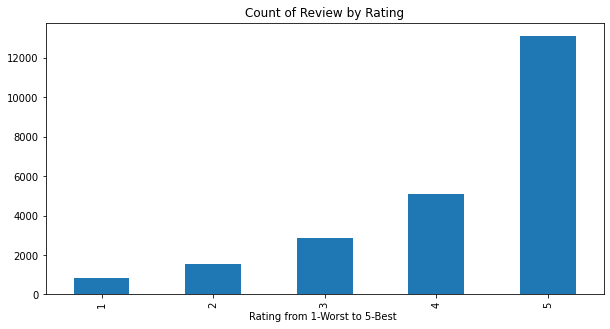

In [ ]:
ax = review_df['Rating'].value_counts().sort_index().plot(kind='bar',
                                                     title='Count of Review by Rating',
                                                     figsize=(10,5))
ax.set_xlabel('Rating from 1-Worst to 5-Best ')
plt.show

Most of review are best - positive reviews


In [ ]:
review_df['Clothing ID'].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
        ... 
776        1
668        1
633        1
734        1
522        1
Name: Clothing ID, Length: 1206, dtype: int64

In [ ]:
review_df['Department Name'].nunique()

6

## Percentage of reviews by Department

In [ ]:
review_df.head(5)

Clothing ID  Age             Title Review  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   
4          847   47         Flattering shirt   

                                              Review  Rating  Recommended IND  \
0        absolutely wonderful silky sexy comfortable       4                1   
1  love dress sooo pretty happened find store im ...       5                1   
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   
4  shirt flattering due adjustable front tie perf...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
review_df['Department Name'].value_counts()

Tops        10482
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

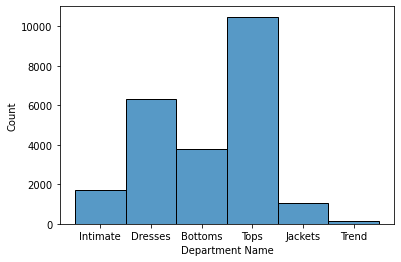

In [ ]:
#@title Văn bản tiêu đề mặc định
sns.histplot(x='Department Name',data=review_df)

In [ ]:
per_review = (review_df.groupby(['Department Name'])['Review'].count()/len(review_df['Review']))*100
per_review = pd.DataFrame(per_review)
per_review

Review
Department Name           
Bottoms          16.175594
Dresses          26.905390
Intimate          7.387380
Jackets           4.394107
Tops             44.630844
Trend             0.506685

Text(0, 0.5, 'Percentage of Review')

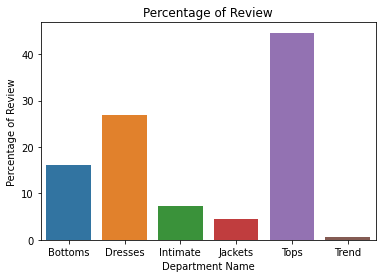

In [ ]:
sns.barplot(x=per_review.index, y='Review',data=per_review)
plt.title('Percentage of Review')
plt.ylabel('Percentage of Review')

In [ ]:
per_rating = (review_df.groupby(['Department Name'])['Rating'].count()/len(review_df['Rating']))*100
per_rating  = pd.DataFrame(per_rating)
per_rating 

Rating
Department Name           
Bottoms          16.175594
Dresses          26.905390
Intimate          7.387380
Jackets           4.394107
Tops             44.630844
Trend             0.506685

## Rating by Department

In [ ]:
# create new dataframe that have Department and Rating columns 
new_df = review_df[['Department Name','Rating']]

In [ ]:
#create number of rating per department 
base = review_df.groupby('Department Name').agg({'Rating':'value_counts',
                                                 'Clothing ID':'nunique'}
                                                 ).reset_index()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/multi.py:3559: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  result = lib.fast_unique_multiple([self._values, rvals], sort=sort)


In [ ]:
# drop Clothing ID column
base = base.drop(['Clothing ID'],axis=1)

In [ ]:
# rename columns
base.columns = ['department_name','rating','number_of_rating']
#drop null value
base['number_of_rating'] = base['number_of_rating'].dropna()

In [ ]:
# change data type
base[['number_of_rating']] = base[['number_of_rating']].astype('Int64', errors='ignore')

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   department_name   36 non-null     object
 1   rating            36 non-null     object
 2   number_of_rating  30 non-null     Int64 
dtypes: Int64(1), object(2)
memory usage: 1.0+ KB


In [ ]:
# create dataset for each department
bottom = base[base['department_name'] == 'Bottoms']
dresses = base[base['department_name'] == 'Dresses']
intimate = base[base['department_name'] == 'Intimate']
jackets = base[base['department_name'] == 'Jackets']
tops = base[base['department_name'] == 'Tops']
trend = base[base['department_name'] == 'Trend']

In [ ]:
bottom['percent_rating'] = (bottom['number_of_rating']/bottom['number_of_rating'].sum()) * 100
dresses ['percent_rating'] = (dresses ['number_of_rating']/dresses ['number_of_rating'].sum()) * 100
intimate['percent_rating'] = (intimate['number_of_rating']/intimate['number_of_rating'].sum()) * 100
jackets['percent_rating'] = (jackets['number_of_rating']/jackets['number_of_rating'].sum()) * 100
tops['percent_rating'] = (tops['number_of_rating']/tops['number_of_rating'].sum()) * 100
trend['percent_rating'] = (trend['number_of_rating']/trend['number_of_rating'].sum()) * 100

<ipython-input-129-ea63de6d86e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom['percent_rating'] = (bottom['number_of_rating']/bottom['number_of_rating'].sum()) * 100
<ipython-input-129-ea63de6d86e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dresses ['percent_rating'] = (dresses ['number_of_rating']/dresses ['number_of_rating'].sum()) * 100
<ipython-input-129-ea63de6d86e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

Text(0.5, 1.0, 'trend')

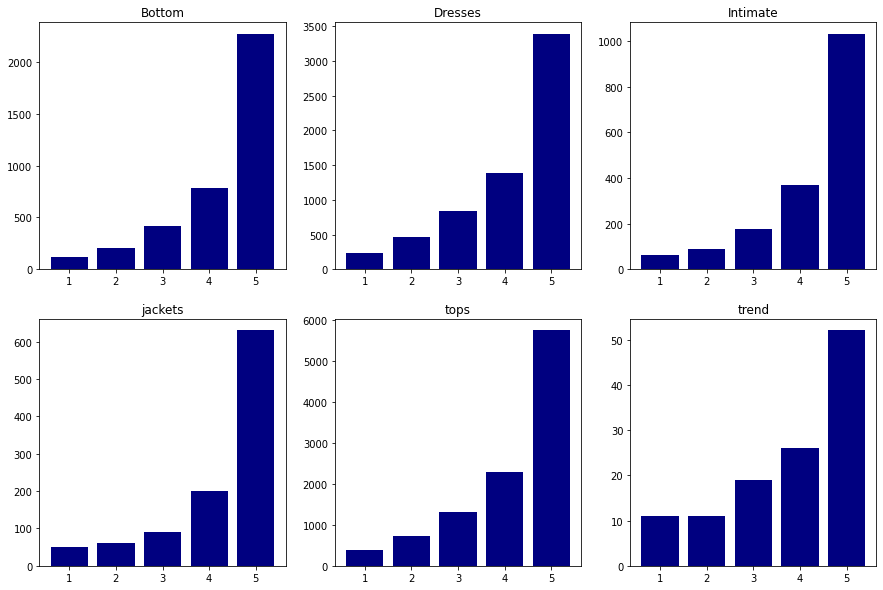

In [ ]:
# visualize each department

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(15,10))

ax1.bar(x='rating', height='number_of_rating',data=bottom,color='navy')
ax1.set_title('Bottom')

ax2.bar(x='rating', height='number_of_rating',data=dresses ,color='navy')
ax2.set_title('Dresses')

ax3.bar(x='rating', height='number_of_rating',data=intimate,color='navy')
ax3.set_title('Intimate')

ax4.bar(x='rating', height='number_of_rating',data=jackets,color='navy')
ax4.set_title('jackets')

ax5.bar(x='rating', height='number_of_rating',data=tops,color='navy')
ax5.set_title('tops')

ax6.bar(x='rating', height='number_of_rating',data=trend,color='navy')
ax6.set_title('trend')

In each department the dominant rating given is 5 stars, the Tops has the highest number of 5 stars within its department. Consumers seem to give fewer 5 stars reviews and give more 1 star review on Intimate 


In [ ]:
bottom_num_rat = base[base['department_name'] == 'Bottoms']['number_of_rating']
dresses_num_rat = base[base['department_name'] == 'Dresses']['number_of_rating']
intimate_num_rat = base[base['department_name'] == 'Intimate']['number_of_rating']
jackets_num_rat = base[base['department_name'] == 'Jackets']['number_of_rating']
tops_num_rat = base[base['department_name'] == 'Tops']['number_of_rating']
trend_num_rat = base[base['department_name'] == 'Trend']['number_of_rating']

In [ ]:
#One-way ANOVA testing
anova_result_depart = f_oneway(bottom_num_rat,dresses_num_rat,intimate_num_rat,jackets_num_rat,tops_num_rat,trend_num_rat)
anova_result_depart

F_onewayResult(statistic=2.508276465116326, pvalue=0.058028689593156074)

## Product Department by Age 

In order to better visualize the customers's age I will group the customers's age columns into six categories
* 20-29
* 30-39
* 40-49
* 50-59
* 60-69
* 70-79
* '> 80'

In [ ]:
review_df.head(3)

Clothing ID  Age             Title Review  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   

                                              Review  Rating  Recommended IND  \
0        absolutely wonderful silky sexy comfortable       4                1   
1  love dress sooo pretty happened find store im ...       5                1   
2  high hopes dress really wanted work me initial...       3                0   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4       General         Dresses    Dresses  
2                        0       General         Dresses    Dresses

In [ ]:
review_df['Age'].min()

18

In [ ]:
review_df['Age'].max()

99

In [ ]:
review_df.loc[(review_df['Age'] >= 20 ) & (review_df['Age'] <= 29 ), 'age_categories'] = '20-29'
review_df.loc[(review_df['Age'] >= 30 ) & (review_df['Age'] <= 39 ), 'age_categories'] = '30-39'
review_df.loc[(review_df['Age'] >= 40 ) & (review_df['Age'] <= 49 ), 'age_categories'] = '40-49'
review_df.loc[(review_df['Age'] >= 50 ) & (review_df['Age'] <= 59 ), 'age_categories'] = '50-59'
review_df.loc[(review_df['Age'] >= 60 ) & (review_df['Age'] <= 69 ), 'age_categories'] = '60-69'
review_df.loc[(review_df['Age'] >= 70 ) & (review_df['Age'] <= 79 ), 'age_categories'] = '70-79'
review_df.loc[(review_df['Age'] >= 80 ), 'age_categories'] = 'greater than 80'

In [ ]:
review_df.head(3)

Clothing ID  Age             Title Review  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   

                                              Review  Rating  Recommended IND  \
0        absolutely wonderful silky sexy comfortable       4                1   
1  love dress sooo pretty happened find store im ...       5                1   
2  high hopes dress really wanted work me initial...       3                0   

   Positive Feedback Count Division Name Department Name Class Name  \
0                        0     Initmates        Intimate  Intimates   
1                        4       General         Dresses    Dresses   
2                        0       General         Dresses    Dresses   

  age_categories  
0          30-39  
1          30-39  
2          60-69

### Distribution of number of reviews by Department

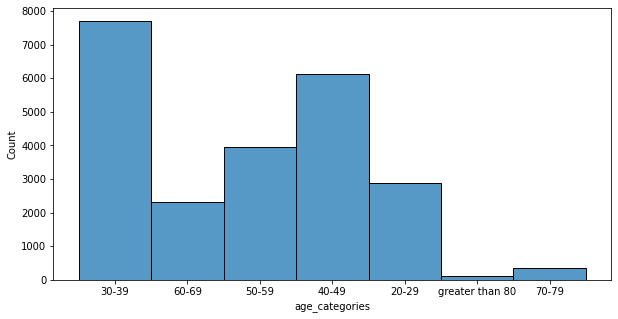

In [ ]:
# Age group distribution
plt.figure(figsize=(10,5))
sns.histplot(x='age_categories',data=review_df)

In [ ]:
# create new dataset for each age group
twenty = review_df[review_df['age_categories'] == '20-29']
thirty = review_df[review_df['age_categories'] == '30-39']
forty = review_df[review_df['age_categories'] == '40-49']
fifty = review_df[review_df['age_categories'] == '50-59']
sixty = review_df[review_df['age_categories'] == '60-69']
seventy = review_df[review_df['age_categories'] == '70-79']
eighty = review_df[review_df['age_categories'] == 'greater than 80']

Text(0.5, 1.0, 'greater than 80')

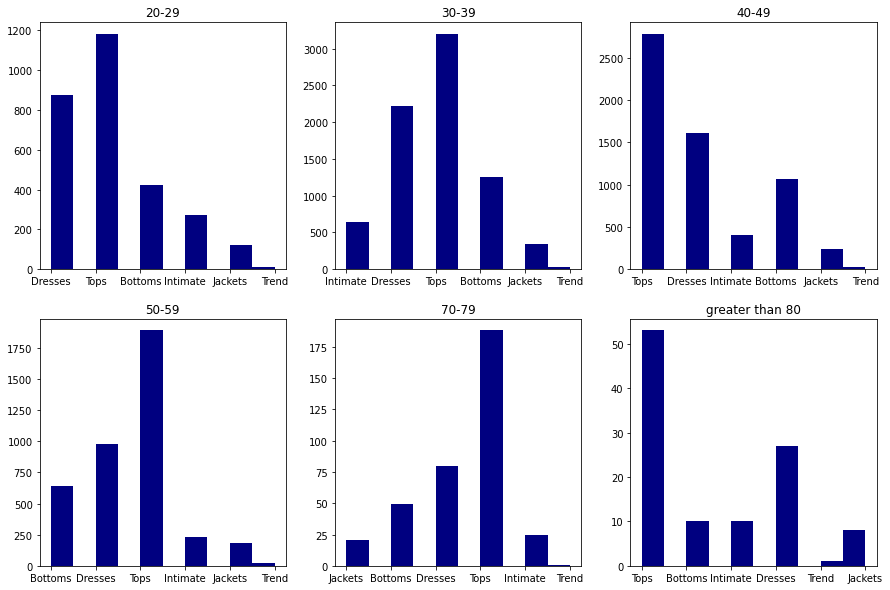

In [ ]:
# Department by age group
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(15,10))

ax1.hist(x='Department Name',data=twenty,color='navy')
ax1.set_title('20-29')

ax2.hist(x='Department Name',data=thirty,color='navy')
ax2.set_title('30-39')

ax3.hist(x='Department Name',data=forty,color='navy')
ax3.set_title('40-49')

ax4.hist(x='Department Name',data=fifty,color='navy')
ax4.set_title('50-59')

ax5.hist(x='Department Name',data=seventy,color='navy')
ax5.set_title('70-79')

ax6.hist(x='Department Name',data=eighty,color='navy')
ax6.set_title('greater than 80')

The Tops received the most reviews in the age groups.

People in their 30’s left the most reviews, followed by people in their 40’s and 50’s. The 70-79 and greater then 80 age groups, however, left the least reveiws.

People in their 20's left the highest review for Tops. The second highest are dresses and bottoms

People in their 30's left the highest review for Tops. The second highest are dresses.

People in their 40's left the highest review for Tops. The second highest are dresses and bottoms

People in their 70's left the highest review for Tops. The second highest are jackets.

This gives companies an idea for who the target demographic is and for what kind of clothing types (tops, dresses) are in demand.

## Title Analysis

In this title analysis, I'm going to use word frequency to identify any issues with the company products. This simple but very powerful technique can give many insights and ideas for improvement or further exploration.

In [ ]:
# install wordcloud
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# WordCload
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Text Mining

In [ ]:
import nltk 
from nltk.tokenize import word_tokenize

# RegexpTokenizer A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.
from nltk.tokenize import RegexpTokenizer

# frequency word
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
review_df.head()

Clothing ID  Age             Title Review  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   
4          847   47         Flattering shirt   

                                              Review  Rating  Recommended IND  \
0        absolutely wonderful silky sexy comfortable       4                1   
1  love dress sooo pretty happened find store im ...       5                1   
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   
4  shirt flattering due adjustable front tie perf...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

  age_categories  
0          30-39  
1          30-39  
2          60-69  
3          50-59  
4          40-49

In [ ]:
# create new data frame for this section
df = review_df[['Clothing ID','Age','Title Review','Review','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name','age_categories']]
df.head(2)

Clothing ID  Age Title Review  \
0          767   33     No Title   
1         1080   34     No Title   

                                              Review  Rating  Recommended IND  \
0        absolutely wonderful silky sexy comfortable       4                1   
1  love dress sooo pretty happened find store im ...       5                1   

   Positive Feedback Count Division Name Department Name Class Name  \
0                        0     Initmates        Intimate  Intimates   
1                        4       General         Dresses    Dresses   

  age_categories  
0          30-39  
1          30-39

#### Remove the entries that have no title 

In [ ]:
# remove the 'No Title' rows on Title Review columns
df = df[df["Title Review"].str.contains("No Title")==False]
df = df[df["Title Review"].str.contains("No title")==False]
df

Clothing ID  Age                            Title Review  \
2             1077   60                 Some major design flaws   
3             1049   50                         My favorite buy   
4              847   47                        Flattering shirt   
5             1080   49                              Not petite   
6              858   39                    Cagrcoal shimmer fun   
...            ...  ...                                     ...   
23481         1104   34              Great dress many occasions   
23482          862   48                        Wish made cotton   
23483         1104   31                                Cute see   
23484         1084   28  Very cute dress perfect summer parties   
23485         1104   52                    Please make like one   

                                                  Review  Rating  \
2      high hopes dress really wanted work me initial...       3   
3      love love love jumpsuit fun flirty fabulous ev...       5   
4      shirt flattering due adjustable front tie perf...       5   
5      love tracy reese dresses one petite 5 feet tal...       2   
6      aded basket hte last mintue see would look lik...       5   
...                                                  ...     ...   
23481  happy snag dress great price easy slip flatter...       5   
23482  reminds maternity clothes soft stretchy shiny ...       3   
23483  fit well top see through never would worked me...       3   
23484  bought dress wedding summer cute unfortunately...       3   
23485  dress lovely platinum feminine fits perfectly ...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
5                    0                        4         General   
6                    1                        1  General Petite   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  ...  \
2             Dresses    Dresses  ...   
3             Bottoms      Pants  ...   
4                Tops    Blouses  ...   
5             Dresses    Dresses  ...   
6                Tops      Knits  ...   
...               ...        ...  ...   
23481         Dresses    Dresses  ...   
23482            Tops      Knits  ...   
23483         Dresses    Dresses  ...   
23484         Dresses    Dresses  ...   
23485         Dresses    Dresses  ...   

                                         title_token  \
2                       [Some, major, design, flaws]   
3                                [My, favorite, buy]   
4                                [Flattering, shirt]   
5                                      [Not, petite]   
6                           [Cagrcoal, shimmer, fun]   
...                                              ...   
23481                [Great, dress, many, occasions]   
23482                           [Wish, made, cotton]   
23483                                    [Cute, see]   
23484  [Very, cute, dress, perfect, summer, parties]   
23485                      [Please, make, like, one]   

                                            review_token  \
2      [high, hopes, dress, really, wanted, work, me,...   
3      [love, love, love, jumpsuit, fun, flirty, fabu...   
4      [shirt, flattering, due, adjustable, front, ti...   
5      [love, tracy, reese, dresses, one, petite, 5, ...   
6      [aded, basket, hte, last, mintue, see, would, ...   
...                                                  .

#### Tokenization

https://regexr.com/38ndp

In [ ]:
#\w matches any word character
# + Match or more of the preceding token
# ('\w+') matches Unicode word characters with one or more occurrences

regexp = RegexpTokenizer('\w+')
df['title_token'] = df['Title Review'].apply(regexp.tokenize)
df['review_token'] = df['Review'].apply(regexp.tokenize)
df.head(5)

Clothing ID  Age             Title Review  \
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   
4          847   47         Flattering shirt   
5         1080   49               Not petite   
6          858   39     Cagrcoal shimmer fun   

                                              Review  Rating  Recommended IND  \
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   
4  shirt flattering due adjustable front tie perf...       5                1   
5  love tracy reese dresses one petite 5 feet tal...       2                0   
6  aded basket hte last mintue see would look lik...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
2                        0         General         Dresses    Dresses  ...   
3                        0  General Petite         Bottoms      Pants  ...   
4                        6         General            Tops    Blouses  ...   
5                        4         General         Dresses    Dresses  ...   
6                        1  General Petite            Tops      Knits  ...   

                    title_token  \
2  [Some, major, design, flaws]   
3           [My, favorite, buy]   
4           [Flattering, shirt]   
5                 [Not, petite]   
6      [Cagrcoal, shimmer, fun]   

                                        review_token             title_string  \
2  [high, hopes, dress, really, wanted, work, me,...  Some major design flaws   
3  [love, love, love, jumpsuit, fun, flirty, fabu...             favorite buy   
4  [shirt, flattering, due, adjustable, front, ti...         Flattering shirt   
5  [love, tracy, reese, dresses, one, petite, 5, ...               Not petite   
6  [aded, basket, hte, last, mintue, see, would, ...     Cagrcoal shimmer fun   

                                       review_string frequent_title_string  \
2  high hopes dress really wanted work initially ...     Some major design   
3  love love love jumpsuit fun flirty fabulous ev...          favorite buy   
4  shirt flattering due adjustable front tie perf...                 shirt   
5  love tracy reese dresses one petite feet tall ...                petite   
6  aded basket hte last mintue see would look lik...           shimmer fun   

                              frequent_review_string   title_string_lem  \
2  high hopes dress really wanted work ordered pe...  Some major design   
3  love love love jumpsuit fun flirty fabulous ev...       favorite buy   
4  shirt flattering due front tie perfect length ...              shirt   
5  love tracy reese dresses one petite tall usual...             petite   
6  hte last see would look like person store pick...        shimmer fun   

                                   review_string_lem is_title_equal  \
2  high hopes dress really wanted work ordered pe...           True   
3  love love love jumpsuit fun flirty fabulous ev...           True   
4  shirt flattering due front tie perfect length ...           True   
5  love tracy reese dresses one petite tall usual...           True   
6  hte last see would look like person store pick...           True   

   is_review_equal  
2             True  
3             True  
4             True  
5             True  
6             True  

[5 rows x 21 columns]

#### Remove infrequent words

change the format of `title_token` and `review_token` to strings and keep only words which are longer than 2 letters

In [ ]:
df['title_string'] = df['title_token'].apply(lambda x:' '.join([item for item in x if len(item)>2]))
df['review_string'] = df['review_token'].apply(lambda x:' '.join([item for item in x if len(item)>2]))
df.head(5)

Clothing ID  Age             Title Review  \
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   
4          847   47         Flattering shirt   
5         1080   49               Not petite   
6          858   39     Cagrcoal shimmer fun   

                                              Review  Rating  Recommended IND  \
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   
4  shirt flattering due adjustable front tie perf...       5                1   
5  love tracy reese dresses one petite 5 feet tal...       2                0   
6  aded basket hte last mintue see would look lik...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
2                        0         General         Dresses    Dresses  ...   
3                        0  General Petite         Bottoms      Pants  ...   
4                        6         General            Tops    Blouses  ...   
5                        4         General         Dresses    Dresses  ...   
6                        1  General Petite            Tops      Knits  ...   

                    title_token  \
2  [Some, major, design, flaws]   
3           [My, favorite, buy]   
4           [Flattering, shirt]   
5                 [Not, petite]   
6      [Cagrcoal, shimmer, fun]   

                                        review_token             title_string  \
2  [high, hopes, dress, really, wanted, work, me,...  Some major design flaws   
3  [love, love, love, jumpsuit, fun, flirty, fabu...             favorite buy   
4  [shirt, flattering, due, adjustable, front, ti...         Flattering shirt   
5  [love, tracy, reese, dresses, one, petite, 5, ...               Not petite   
6  [aded, basket, hte, last, mintue, see, would, ...     Cagrcoal shimmer fun   

                                       review_string frequent_title_string  \
2  high hopes dress really wanted work initially ...     Some major design   
3  love love love jumpsuit fun flirty fabulous ev...          favorite buy   
4  shirt flattering due adjustable front tie perf...                 shirt   
5  love tracy reese dresses one petite feet tall ...                petite   
6  aded basket hte last mintue see would look lik...           shimmer fun   

                              frequent_review_string   title_string_lem  \
2  high hopes dress really wanted work ordered pe...  Some major design   
3  love love love jumpsuit fun flirty fabulous ev...       favorite buy   
4  shirt flattering due front tie perfect length ...              shirt   
5  love tracy reese dresses one petite tall usual...             petite   
6  hte last see would look like person store pick...        shimmer fun   

                                   review_string_lem is_title_equal  \
2  high hopes dress really wanted work ordered pe...           True   
3  love love love jumpsuit fun flirty fabulous ev...           True   
4  shirt flattering due front tie perfect length ...           True   
5  love tracy reese dresses one petite tall usual...           True   
6  hte last see would look like person store pick...           True   

   is_review_equal  
2             True  
3             True  
4             True  
5             True  
6             True  

[5 rows x 21 columns]

#### Create a list of frequent words

In [ ]:
# create a list of words for each column
all_words_title = ''.join([word for word in df['title_string']])
all_word_review = ''.join([word for word in df['review_string']])

In [ ]:
# tokenize all words
tokenized_title = nltk.word_tokenize(all_words_title)
tokenized_review = nltk.word_tokenize(all_word_review)

In [ ]:
# frequency distribution which records the number of times each word has occurred
frequent_title = FreqDist(tokenized_title)
frequent_review = FreqDist(tokenized_review)


In [ ]:
frequent_title

FreqDist({'dress': 356, 'summer': 311, 'runs': 249, 'top': 239, 'cute': 232, 'love': 209, 'great': 204, 'fit': 177, 'like': 148, 'color': 134, ...})

In [ ]:
frequent_review

FreqDist({'dress': 8034, 'size': 7425, 'fit': 6302, 'like': 5951, 'top': 5742, 'wear': 5470, 'love': 4993, 'great': 4697, 'would': 4389, 'fabric': 4115, ...})

#### Drop words which occur less than 1 times

In [ ]:
df['frequent_title_string'] = df['title_token'].apply(lambda x: ' '.join([item for item in x if frequent_title[item] >= 1]))
df['frequent_review_string'] = df['review_token'].apply(lambda x: ' '.join([item for item in x if frequent_title[item] >= 1]))
df.head(5)

Clothing ID  Age             Title Review  \
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   
4          847   47         Flattering shirt   
5         1080   49               Not petite   
6          858   39     Cagrcoal shimmer fun   

                                              Review  Rating  Recommended IND  \
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   
4  shirt flattering due adjustable front tie perf...       5                1   
5  love tracy reese dresses one petite 5 feet tal...       2                0   
6  aded basket hte last mintue see would look lik...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
2                        0         General         Dresses    Dresses  ...   
3                        0  General Petite         Bottoms      Pants  ...   
4                        6         General            Tops    Blouses  ...   
5                        4         General         Dresses    Dresses  ...   
6                        1  General Petite            Tops      Knits  ...   

                    title_token  \
2  [Some, major, design, flaws]   
3           [My, favorite, buy]   
4           [Flattering, shirt]   
5                 [Not, petite]   
6      [Cagrcoal, shimmer, fun]   

                                        review_token             title_string  \
2  [high, hopes, dress, really, wanted, work, me,...  Some major design flaws   
3  [love, love, love, jumpsuit, fun, flirty, fabu...             favorite buy   
4  [shirt, flattering, due, adjustable, front, ti...         Flattering shirt   
5  [love, tracy, reese, dresses, one, petite, 5, ...               Not petite   
6  [aded, basket, hte, last, mintue, see, would, ...     Cagrcoal shimmer fun   

                                       review_string frequent_title_string  \
2  high hopes dress really wanted work initially ...     Some major design   
3  love love love jumpsuit fun flirty fabulous ev...          favorite buy   
4  shirt flattering due adjustable front tie perf...                 shirt   
5  love tracy reese dresses one petite feet tall ...                petite   
6  aded basket hte last mintue see would look lik...           shimmer fun   

                              frequent_review_string   title_string_lem  \
2  high hopes dress really wanted work ordered pe...  Some major design   
3  love love love jumpsuit fun flirty fabulous ev...       favorite buy   
4  shirt flattering due front tie perfect length ...              shirt   
5  love tracy reese dresses one petite tall usual...             petite   
6  hte last see would look like person store pick...        shimmer fun   

                                   review_string_lem is_title_equal  \
2  high hopes dress really wanted work ordered pe...           True   
3  love love love jumpsuit fun flirty fabulous ev...           True   
4  shirt flattering due front tie perfect length ...           True   
5  love tracy reese dresses one petite tall usual...           True   
6  hte last see would look like person store pick...           True   

   is_review_equal  
2             True  
3             True  
4             True  
5             True  
6             True  

[5 rows x 21 columns]

#### Lemmatization
the process of reducing the different forms of a word to one single form, for example, reducing "builds", "building", or "built" to the lemma "build"
(grouping inflected forms together as a single base form)

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
word_lem =  WordNetLemmatizer()

In [ ]:
df['title_string_lem'] = df['frequent_title_string'].apply(word_lem.lemmatize)
df['review_string_lem'] = df['frequent_review_string'].apply(word_lem.lemmatize)

Check how much words be lemmatized

In [ ]:
df.head(2)

Clothing ID  Age             Title Review  \
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   

                                              Review  Rating  Recommended IND  \
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
2                        0         General         Dresses    Dresses  ...   
3                        0  General Petite         Bottoms      Pants  ...   

                    title_token  \
2  [Some, major, design, flaws]   
3           [My, favorite, buy]   

                                        review_token             title_string  \
2  [high, hopes, dress, really, wanted, work, me,...  Some major design flaws   
3  [love, love, love, jumpsuit, fun, flirty, fabu...             favorite buy   

                                       review_string frequent_title_string  \
2  high hopes dress really wanted work initially ...     Some major design   
3  love love love jumpsuit fun flirty fabulous ev...          favorite buy   

                              frequent_review_string   title_string_lem  \
2  high hopes dress really wanted work ordered pe...  Some major design   
3  love love love jumpsuit fun flirty fabulous ev...       favorite buy   

                                   review_string_lem is_title_equal  \
2  high hopes dress really wanted work ordered pe...           True   
3  love love love jumpsuit fun flirty fabulous ev...           True   

   is_review_equal  
2             True  
3             True  

[2 rows x 21 columns]

In [ ]:
# check if the columns are equal
df['is_title_equal'] = (df['frequent_title_string'] == df['title_string_lem'])
df['is_review_equal'] =(df['frequent_review_string'] == df['review_string_lem'])

In [ ]:
df.is_title_equal.value_counts()

True     19200
False      509
Name: is_title_equal, dtype: int64

In [ ]:
df.is_review_equal.value_counts()

True     19708
False        1
Name: is_review_equal, dtype: int64

### create new dataframes based on rating 

In [ ]:
rating_1 = df[df['Rating'] == 1]
rating_2 = df[df['Rating'] == 2]
rating_3 = df[df['Rating'] == 3]
rating_4 = df[df['Rating'] == 4]
rating_5 = df[df['Rating'] == 5]

### 1-star review

#### The most common title in 1-star review

In [ ]:
rating_1.head(3)

Clothing ID  Age  Title Review  \
61           368   36    Itchy tags   
97           861   44          Huge   
110          861   44  Poor quality   

                                                Review  Rating  \
61   3 tags sewn in 2 small about 1 long 1 huge abo...       1   
97   excited order top red xs cute huge shapeless s...       1   
110  thin poor quality especially price felt like t...       1   

     Recommended IND  Positive Feedback Count   Division Name Department Name  \
61                 0                        0       Initmates        Intimate   
97                 0                        0  General Petite            Tops   
110                0                       11  General Petite            Tops   

    Class Name  ...      title_token  \
61   Intimates  ...    [Itchy, tags]   
97       Knits  ...           [Huge]   
110      Knits  ...  [Poor, quality]   

                                          review_token  title_string  \
61   [3, tags, sewn, in, 2, small, about, 1, long, ...    Itchy tags   
97   [excited, order, top, red, xs, cute, huge, sha...          Huge   
110  [thin, poor, quality, especially, price, felt,...  Poor quality   

                                         review_string frequent_title_string  \
61   tags sewn small about long huge about itchy cu...                  tags   
97   excited order top red cute huge shapeless supp...                         
110  thin poor quality especially price felt like t...               quality   

                                frequent_review_string title_string_lem  \
61   tags sewn small long huge itchy cut out left e...              tag   
97   excited order top red cute huge shapeless supp...                    
110  thin poor quality especially price felt like t...          quality   

                                     review_string_lem is_title_equal  \
61   tags sewn small long huge itchy cut out left e...          False   
97   excited order top red cute huge shapeless supp...           True   
110  thin poor quality especially price felt like t...           True   

     is_review_equal  
61              True  
97              True  
110             True  

[3 rows x 21 columns]

##### `title_string`

In [ ]:
common = rating_1['title_string'].value_counts().sort_values(ascending=False)
common = pd.DataFrame(common)
common = common[common['title_string'] > 3]
common

title_string
Disappointed               17
Poor quality               12
Disappointing               8
Terrible                    7
disappointed                7
Huge                        7
Not pictured                7
Nope                        5
                            5
Not expected                5
Not flattering              5
Wanted love                 5
Poor fit                    5
Weird fit                   4
Horrible                    4
Unflattering                4
Not                         4
Too much fabric             4

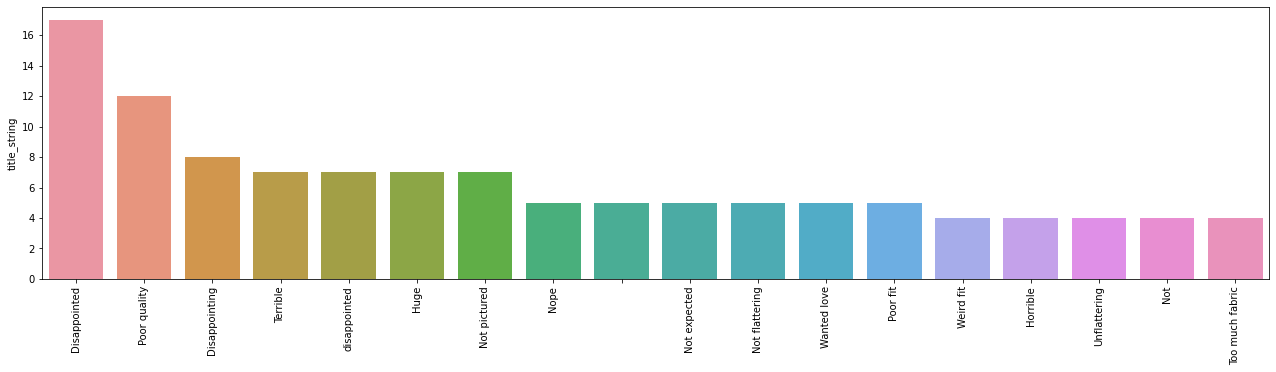

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=common.index,y='title_string',data=common)

##### `title_string_lem`




In [ ]:
common_lem = rating_1['title_string_lem'].value_counts().sort_values(ascending=False)
common_lem = pd.DataFrame(common_lem)
common_lem = common_lem[common_lem['title_string_lem'] > 3]
common_lem

title_string_lem
                           178
fit                         18
quality                     15
disappointed                13
pictured                     8
tent                         8
short                        6
fabric                       6
expected                     6
unflattering                 6
flattering                   5
love                         5
small                        5
big                          5
like picture                 4
dress                        4
worth                        4
boxy                         4
much fabric                  4

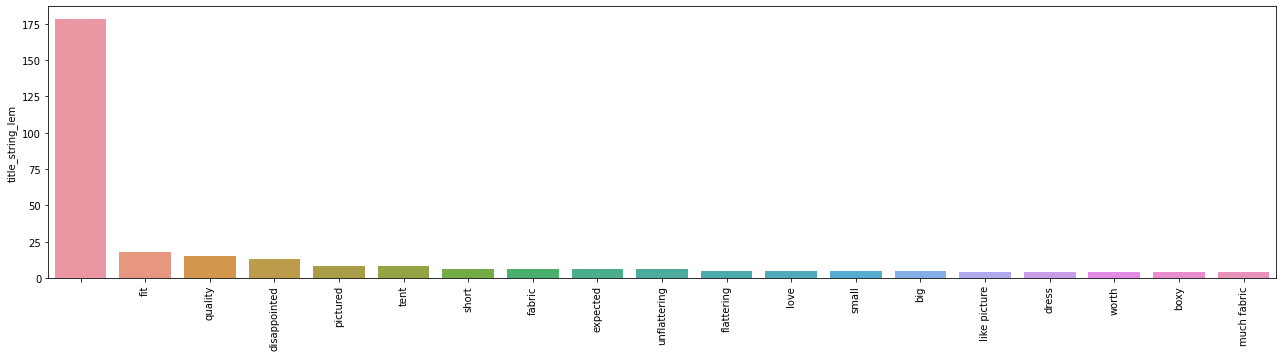

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=common_lem.index,y='title_string_lem',data=common_lem)

#### WorldCloud on 1-star reviews

(-0.5, 599.5, 399.5, -0.5)

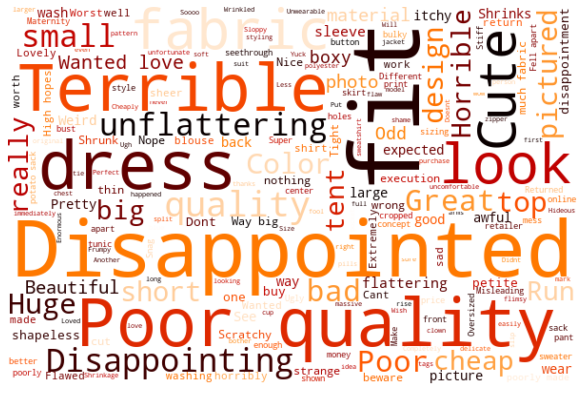

In [ ]:
# create a list of all word in title_string column
all_word_title =  ' '.join([word for word in rating_1['title_string']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white",colormap='gist_heat').generate(all_word_title)
plt.figure(figsize=(13, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


(-0.5, 599.5, 399.5, -0.5)

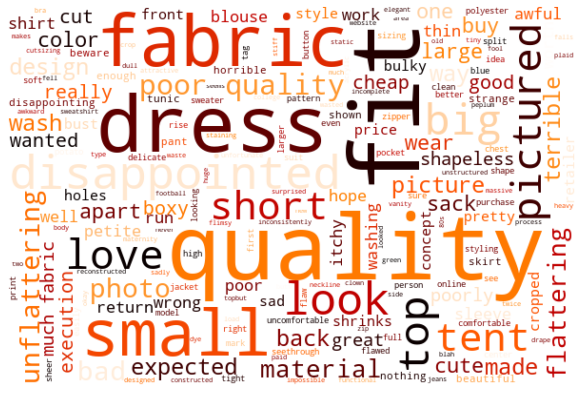

In [ ]:
# create a list of all word
all_word_rating_1 =  ' '.join([word for word in rating_1['title_string_lem']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white",colormap='gist_heat').generate(all_word_rating_1)
plt.figure(figsize=(13, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


1. In 1-star ratings, clients talk mostly about "dress" and 'quality' 
2. Customers also talk about problems with fit and size such as small, short -  the company can take a close look at the size of their clothes and maybe add more information about it on the website.
3. Customers mentioned fabric and material which should be evaluated and improved if possible.

### 2-star review

#### The most common title in 2-star review

In [ ]:
rating_2.head(2)

Clothing ID  Age    Title Review  \
5          1080   49      Not petite   
22         1077   31  Not looks like   

                                               Review  Rating  \
5   love tracy reese dresses one petite 5 feet tal...       2   
22  first all pullover styling side zipper purchas...       2   

    Recommended IND  Positive Feedback Count Division Name Department Name  \
5                 0                        4       General         Dresses   
22                0                        7       General         Dresses   

   Class Name  ...         title_token  \
5     Dresses  ...       [Not, petite]   
22    Dresses  ...  [Not, looks, like]   

                                         review_token    title_string  \
5   [love, tracy, reese, dresses, one, petite, 5, ...      Not petite   
22  [first, all, pullover, styling, side, zipper, ...  Not looks like   

                                        review_string frequent_title_string  \
5   love tracy reese dresses one petite feet tall ...                petite   
22  first all pullover styling side zipper purchas...            looks like   

                               frequent_review_string title_string_lem  \
5   love tracy reese dresses one petite tall usual...           petite   
22  first all pullover styling side zipper purchas...       looks like   

                                    review_string_lem is_title_equal  \
5   love tracy reese dresses one petite tall usual...           True   
22  first all pullover styling side zipper purchas...           True   

    is_review_equal  
5              True  
22             True  

[2 rows x 21 columns]

##### `title_string`

In [ ]:
common_rating_2 = rating_2['title_string'].value_counts().sort_values(ascending=False)
common_rating_2 = pd.DataFrame(common_rating_2)
common_rating_2 = common_rating_2[common_rating_2['title_string'] > 3]
common_rating_2

title_string
Wanted love               22
Not expected              17
Disappointed              16
Disappointing             16
Huge                      14
Not great                  8
Unflattering               8
Not                        8
Didnt work                 8
Boxy                       7
Not flattering             7
Runs small                 7
Poor quality               6
Weird fit                  6
Meh                        6
Not pictured               6
Odd fit                    6
disappointed               5
Too sheer                  5
Not impressed              5
Too short                  5
Too small                  5
Missed mark                4
Shapeless                  4
                           4
Nope                       4
Runs big                   4
shape                      4
wanted love                4
Way big                    4

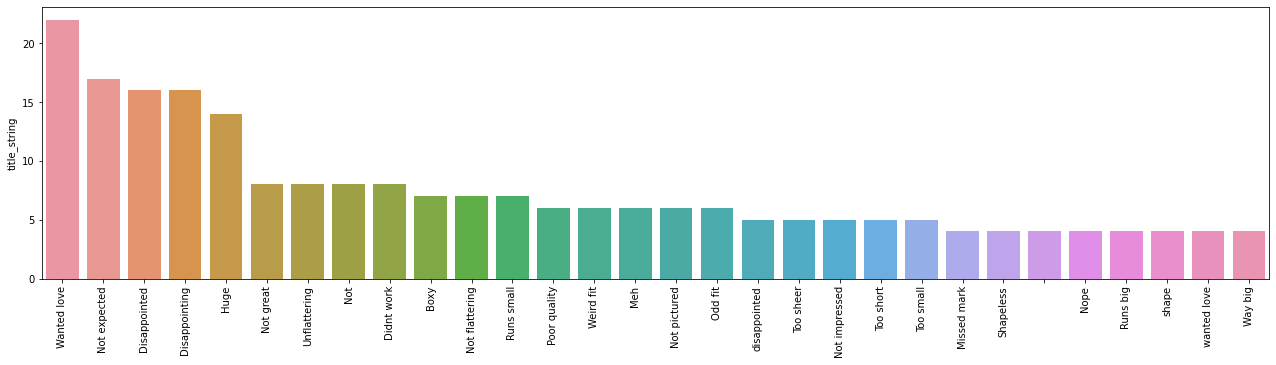

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=common_rating_2.index,y='title_string',data=common_rating_2)

##### `title_string_lem`

In [ ]:
rating_2_lem = rating_2['title_string_lem'].value_counts().sort_values(ascending=False)
rating_2_lem = pd.DataFrame(rating_2_lem)
rating_2_lem = rating_2_lem[rating_2_lem['title_string_lem'] > 3]
rating_2_lem.head(10)

title_string_lem
                         256
fit                       30
love                      24
expected                  18
small                     16
big                       13
shape                     11
short                     11
flattering                10
quality                   10

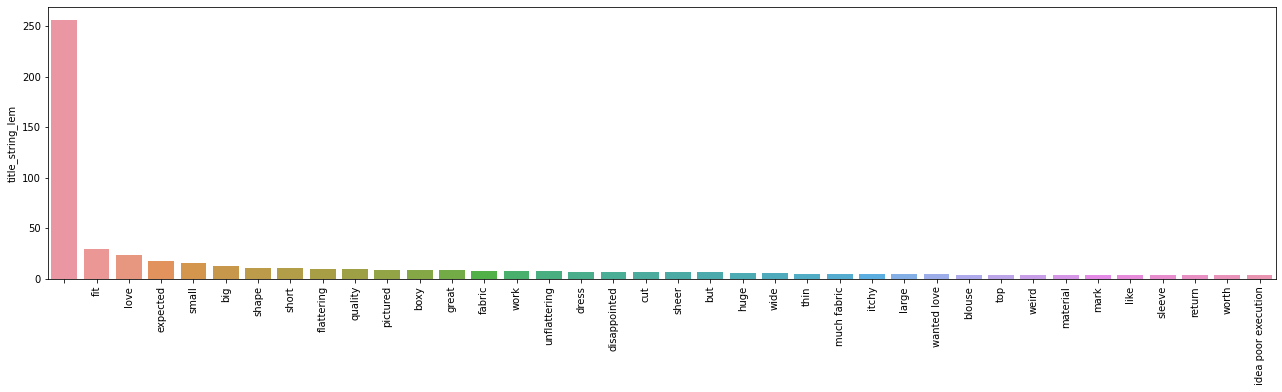

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=rating_2_lem.index,y='title_string_lem',data=rating_2_lem)

#### WorldCloud on 2-star reviews

(-0.5, 599.5, 399.5, -0.5)

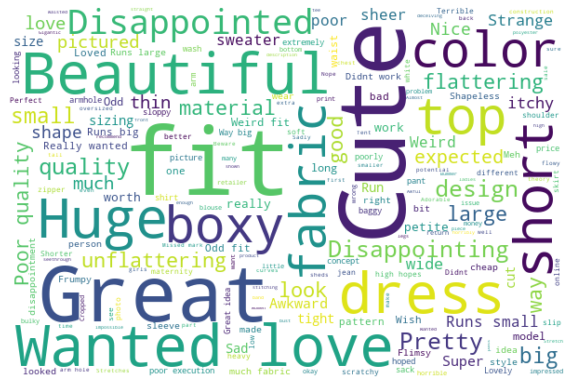

In [ ]:
all_word_title_2 =  ' '.join([word for word in rating_2['title_string']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white").generate(all_word_title_2)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


(-0.5, 599.5, 399.5, -0.5)

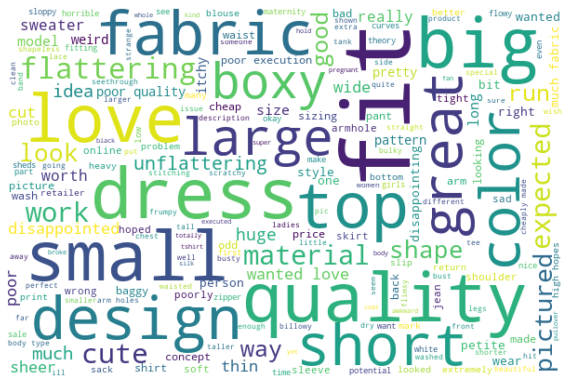

In [ ]:
# create a list of all word
all_word_rating_2 =  ' '.join([word for word in rating_2['title_string_lem']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white").generate(all_word_rating_2)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

1. In 2-star ratings, clients talk mostly about "dress" and 'top'
2. Customers also have the problems whit fit and size
3. Customers mentioned fabric, quality, and design which should be evaluated and improved if possible.
4. Color - sometimes clothes on pictures can have different color than they actually do. The company should explore this issue further and make sure that they display colors correctly. Quality of the pictures is crutial for the online clothing retailers

### 3-star review

#### The most common title in 3-star review

In [ ]:
rating_3.head(2)

Clothing ID  Age                          Title Review  \
2          1077   60               Some major design flaws   
10         1077   53  Dress looks like made cheap material   

                                               Review  Rating  \
2   high hopes dress really wanted work me initial...       3   
10  dress runs small esp zipper area runs ordered ...       3   

    Recommended IND  Positive Feedback Count Division Name Department Name  \
2                 0                        0       General         Dresses   
10                0                       14       General         Dresses   

   Class Name  ...                                  title_token  \
2     Dresses  ...                 [Some, major, design, flaws]   
10    Dresses  ...  [Dress, looks, like, made, cheap, material]   

                                         review_token  \
2   [high, hopes, dress, really, wanted, work, me,...   
10  [dress, runs, small, esp, zipper, area, runs, ...   

                            title_string  \
2                Some major design flaws   
10  Dress looks like made cheap material   

                                        review_string  \
2   high hopes dress really wanted work initially ...   
10  dress runs small esp zipper area runs ordered ...   

             frequent_title_string  \
2                Some major design   
10  looks like made cheap material   

                               frequent_review_string  \
2   high hopes dress really wanted work ordered pe...   
10  dress runs small esp zipper area runs ordered ...   

                  title_string_lem  \
2                Some major design   
10  looks like made cheap material   

                                    review_string_lem is_title_equal  \
2   high hopes dress really wanted work ordered pe...           True   
10  dress runs small esp zipper area runs ordered ...           True   

    is_review_equal  
2              True  
10             True  

[2 rows x 21 columns]

##### `title_string`

In [ ]:
common_rating_3 = rating_3['title_string'].value_counts().sort_values(ascending=False)
common_rating_3 = pd.DataFrame(common_rating_3)
common_rating_3 = common_rating_3[common_rating_3['title_string'] > 3]
common_rating_3

title_string
Not                         26
Wanted love                 26
Runs large                  25
Runs small                  21
Disappointed                19
Just                        17
Meh                         16
Disappointing               14
Cute                        13
Huge                        12
                            12
Just okay                    9
Not pictured                 9
Cute but                     8
Odd fit                      8
Too big                      8
Pretty                       8
Too boxy                     7
Boxy                         7
Not flattering               7
Didnt work                   7
Poor quality                 6
fence                        6
Too short                    6
Cute top                     6
close                        6
wanted love                  5
Weird fit                    5
Not expected                 5
Not busty                    5
Not great                    5
Itchy                        4
Unflattering cut             4
Nice                         4
Wanted love but              4
Beautiful but                4
Not worth price              4
Strange fit                  4
Soso                         4
Short wide                   4
Runs big                     4
Dissapointed                 4

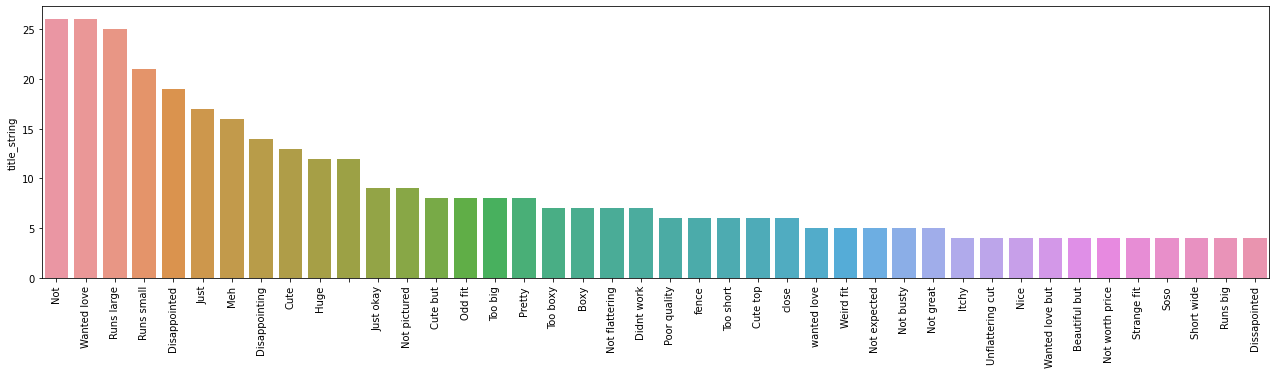

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=common_rating_3.index,y='title_string',data=common_rating_3)

##### `title_string_lem`

In [ ]:
rating_3_lem = rating_3['title_string_lem'].value_counts().sort_values(ascending=False)
rating_3_lem = pd.DataFrame(rating_3_lem)
rating_3_lem = rating_3_lem[rating_3_lem['title_string_lem'] > 3]
rating_3_lem

title_string_lem
                         420
fit                       42
large                     33
love                      32
small                     31
...                      ...
shape                      4
idea                       4
price                      4
runs small                 4
problem                    4

[71 rows x 1 columns]

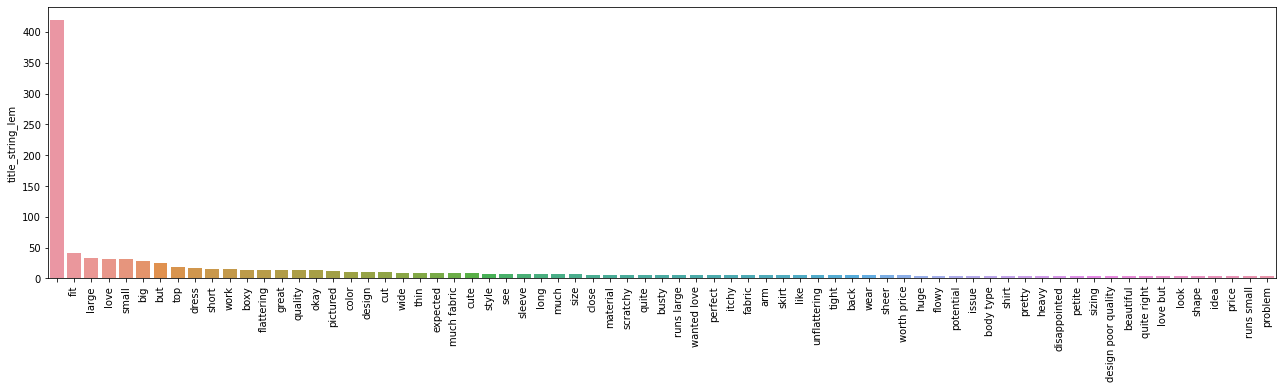

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=rating_3_lem.index,y='title_string_lem',data=rating_3_lem)

#### WorldCloud on 3-star reviews

(-0.5, 599.5, 399.5, -0.5)

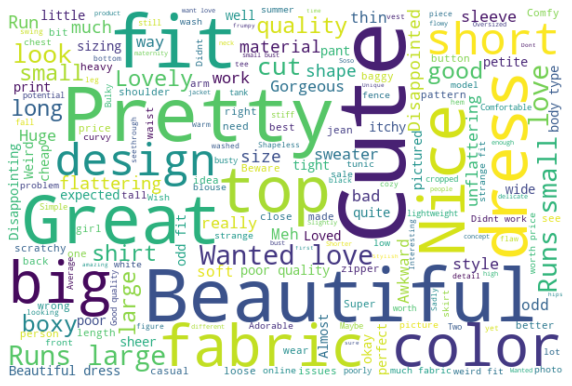

In [ ]:
all_word_title_3 =  ' '.join([word for word in rating_3['title_string']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white").generate(all_word_title_3)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

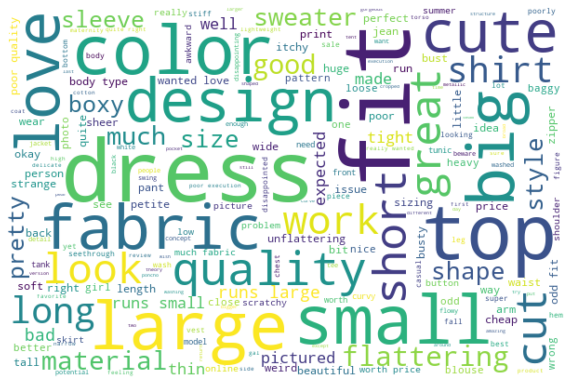

In [ ]:
# create a list of all word
all_word_rating_3 =  ' '.join([word for word in rating_3['title_string_lem']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white").generate(all_word_rating_3)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

### 4-star review

#### The most common title in 4-star review

##### `title_string`

In [ ]:
common_rating_4 = rating_4['title_string'].value_counts().sort_values(ascending=False)
common_rating_4 = pd.DataFrame(common_rating_4)
common_rating_4 = common_rating_4[common_rating_4['title_string'] > 4]
common_rating_4.head(5)

title_string
Cute                  45
Love                  30
Cute top              29
Beautiful             29
Runs small            27

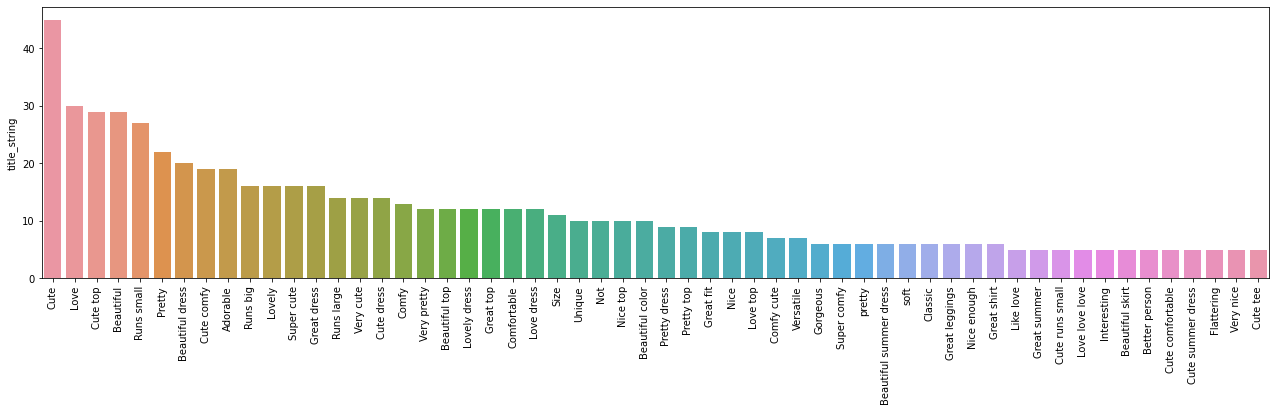

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=common_rating_4.index,y='title_string',data=common_rating_4)

##### `title_string_lem`

In [ ]:
rating_4_lem = rating_4['title_string_lem'].value_counts().sort_values(ascending=False)
rating_4_lem = pd.DataFrame(rating_4_lem)
rating_4_lem = rating_4_lem[rating_4_lem['title_string_lem'] > 4]
rating_4_lem

title_string_lem
                          537
top                       123
dress                     122
cute                       62
comfy                      44
...                       ...
love love                   5
classic                     5
easy dress                  5
comfy dress                 5
sheer                       5

[93 rows x 1 columns]

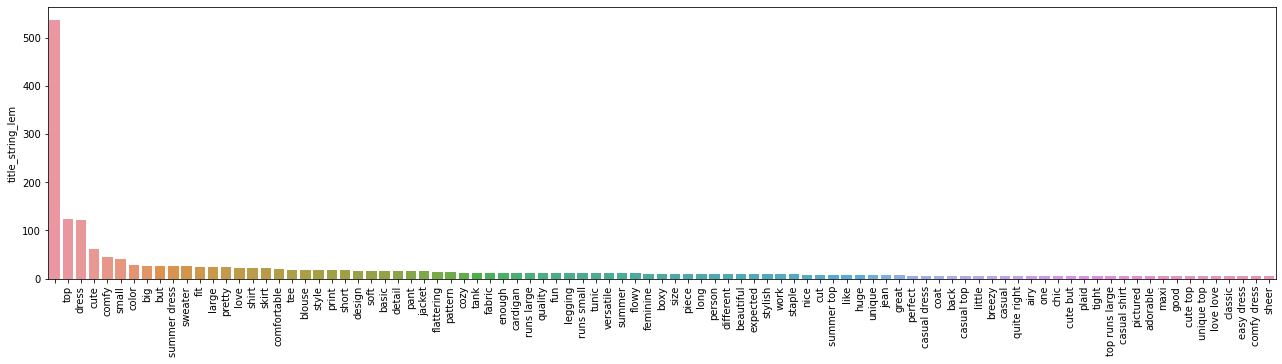

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=rating_4_lem.index,y='title_string_lem',data=rating_4_lem)

#### WorldCloud on 4-star reviews

(-0.5, 599.5, 399.5, -0.5)

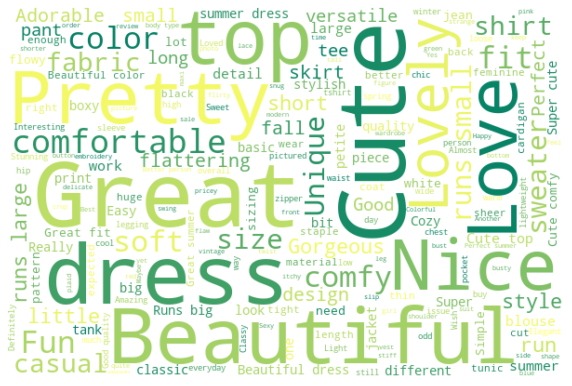

In [ ]:
all_word_title_4 =  ' '.join([word for word in rating_4['title_string']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white",colormap='summer').generate(all_word_title_4)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

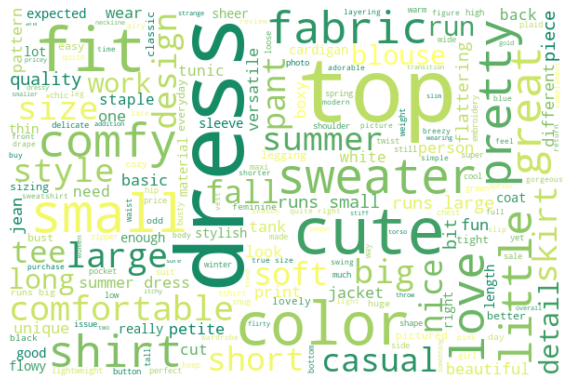

In [ ]:
# create a list of all word
all_word_rating_4 =  ' '.join([word for word in rating_4['title_string_lem']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white",colormap='summer').generate(all_word_rating_4)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

### 5-star review

#### The most common title in 5-star review

##### `title_string`

In [ ]:
common_rating_5 = rating_5['title_string'].value_counts().sort_values(ascending=False)
common_rating_5 = pd.DataFrame(common_rating_5)
common_rating_5 = common_rating_5[common_rating_5['title_string'] > 20]
common_rating_5

title_string
Love                        421
Beautiful                   156
Love dress                   90
Perfect                      90
Gorgeous                     89
Great dress                  76
Beautiful dress              71
Great top                    67
Love love love               66
Super cute                   60
Adorable                     57
Love top                     55
cute                         49
Amazing                      47
Lovely                       45
love                         42
Beautiful top                39
Stunning                     37
Perfection                   36
Cute                         35
Very flattering              35
soft                         32
Cute top                     32
Gorgeous dress               32
Great fit                    32
Love this                    31
Love pants                   30
Flattering                   28
Great shirt                  28
pretty                       27
Love shirt                   25
Cute comfy                   23
Perfect fit                  23
flattering                   23
Love sweater                 22
Great pants                  22
Beautiful sweater            21

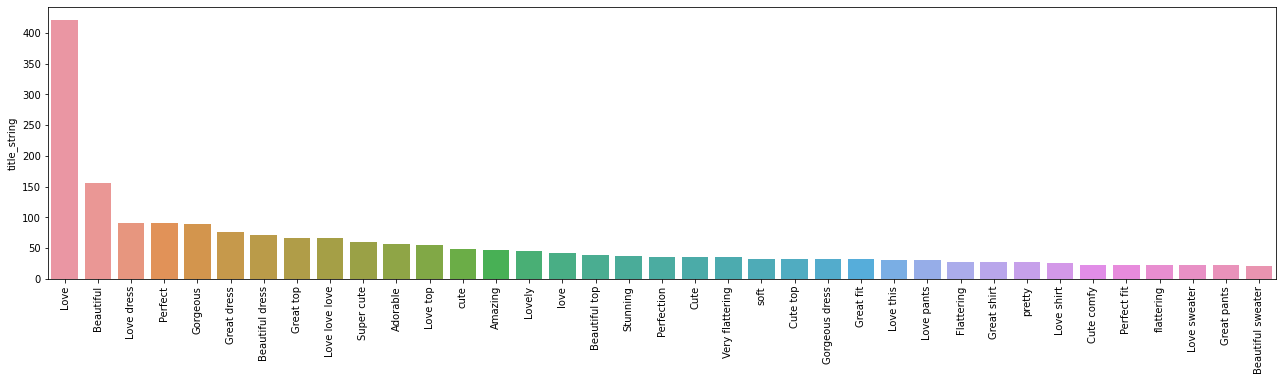

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=common_rating_5.index,y='title_string',data=common_rating_5)

##### `title_string_lem`

In [ ]:
rating_5_lem = rating_5['title_string_lem'].value_counts().sort_values(ascending=False)
rating_5_lem = pd.DataFrame(rating_5_lem)
rating_5_lem = rating_5_lem[rating_5_lem['title_string_lem'] > 10]
rating_5_lem

title_string_lem
                            1915
dress                        457
top                          331
cute                         195
flattering                   140
...                          ...
warm                          11
suit                          11
summer staple                 11
cord                          11
favorite jeans                11

[93 rows x 1 columns]

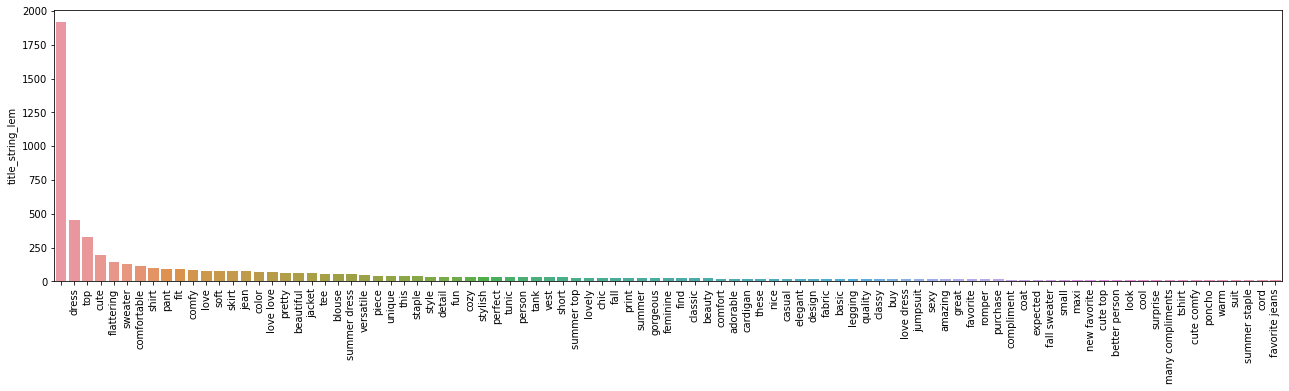

In [ ]:
plt.figure(figsize=(22,5))
plt.xticks(rotation = 90)
sns.barplot(x=rating_5_lem.index,y='title_string_lem',data=rating_5_lem)

#### WorldCloud on 5-star reviews

(-0.5, 599.5, 399.5, -0.5)

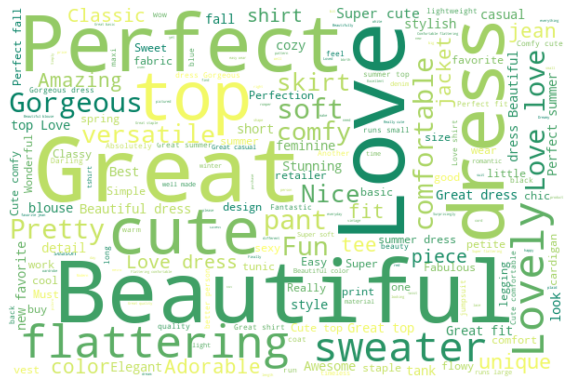

In [ ]:
all_word_title_5 =  ' '.join([word for word in rating_5['title_string']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white",colormap='summer').generate(all_word_title_5)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

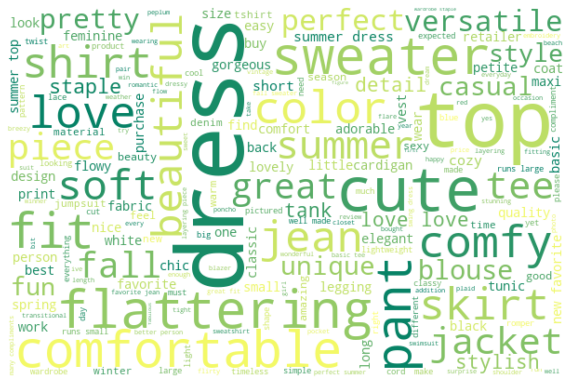

In [ ]:
# create a list of all word
all_word_rating_5 =  ' '.join([word for word in rating_5['title_string_lem']])
wordcloud = WordCloud(width=600, 
                     height=400,
                     random_state=2, 
                     max_font_size=100,
                    background_color="white",colormap='summer').generate(all_word_rating_5)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## Possitive Feedback Analysis

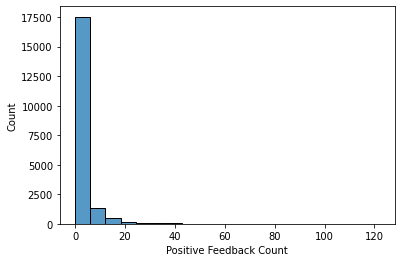

In [ ]:
sns.histplot(df, x='Positive Feedback Count', bins = 20)

### Customer positive feedback by Age

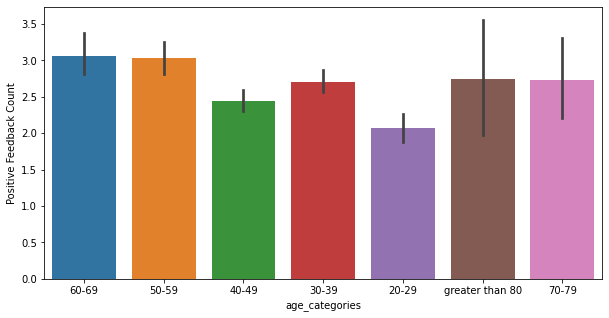

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(data= df, x='age_categories',y='Positive Feedback Count')

* People in their 50's and 60's left the most positive reviews 
* People in their 20's left the lest positive reviews 

#### ANOVA Testing

Is it Age Group affects on Positive Feedback Count?

* H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (all the 
population means are equal)
* H1 (alternative hypothesis): at least one population mean is different from the rest


In [ ]:
twenty_feedback = review_df[review_df['age_categories'] == '20-29']['Positive Feedback Count']
thirty_feedback = review_df[review_df['age_categories'] == '30-39']['Positive Feedback Count']
forty_feedback = review_df[review_df['age_categories'] == '40-49']['Positive Feedback Count']
fifty_feedback = review_df[review_df['age_categories'] == '50-59']['Positive Feedback Count']
sixty_feedback = review_df[review_df['age_categories'] == '60-69']['Positive Feedback Count']
seventy_feedback = review_df[review_df['age_categories'] == '70-79']['Positive Feedback Count']
eighty_feedback = review_df[review_df['age_categories'] == 'greater than 80']['Positive Feedback Count']

In [ ]:
#One-way ANOVA testing
anova_result = f_oneway(twenty_feedback,thirty_feedback,forty_feedback,fifty_feedback,sixty_feedback,seventy_feedback,eighty_feedback)
anova_result

F_onewayResult(statistic=9.250058529872083, pvalue=3.7785935259097843e-10)

the p-value is less than my chosen significance level (e.g. 0.05), then I can reject the null hypothesis and conclude that at least one of the population means is different from the others.

#### Turkey Testing

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title Review             23486 non-null  object
 3   Review                   23486 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23486 non-null  object
 8   Department Name          23486 non-null  object
 9   Class Name               23486 non-null  object
 10  age_categories           23442 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.0+ MB


In [ ]:
# remove null value in age_categories columns
review_df = review_df.dropna()
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23442 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23442 non-null  int64 
 1   Age                      23442 non-null  int64 
 2   Title Review             23442 non-null  object
 3   Review                   23442 non-null  object
 4   Rating                   23442 non-null  int64 
 5   Recommended IND          23442 non-null  int64 
 6   Positive Feedback Count  23442 non-null  int64 
 7   Division Name            23442 non-null  object
 8   Department Name          23442 non-null  object
 9   Class Name               23442 non-null  object
 10  age_categories           23442 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.1+ MB


In [ ]:
tukey = pairwise_tukeyhsd(endog=review_df['Positive Feedback Count'],
                          groups=review_df['age_categories'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1      group2     meandiff p-adj   lower  upper  reject
------------------------------------------------------------
 20-29           30-39    0.492 0.0015  0.1253 0.8588   True
 20-29           40-49   0.4143 0.0218   0.035 0.7937   True
 20-29           50-59   0.8992  0.001  0.4877 1.3108   True
 20-29           60-69   0.9224  0.001   0.453 1.3918   True
 20-29           70-79    0.661 0.3625 -0.2738 1.5957  False
 20-29 greater than 80   0.5659    0.9 -1.0739 2.2056  False
 30-39           40-49  -0.0777    0.9 -0.3654   0.21  False
 30-39           50-59   0.4072 0.0049  0.0783 0.7361   True
 30-39           60-69   0.4303 0.0248  0.0313 0.8293   True
 30-39           70-79   0.1689    0.9 -0.7325 1.0703  False
 30-39 greater than 80   0.0738    0.9 -1.5472 1.6948  False
 40-49           50-59   0.4849  0.001  0.1419 0.8278   True
 40-49           60-69    0.508 0.0049  0.0974 0.9186   True
 40-49           70-79  

### Positive feedback by product department

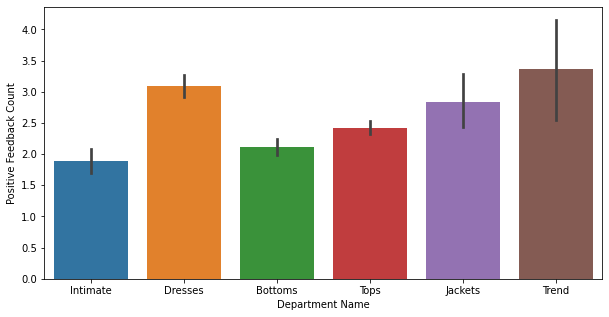

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(data= review_df, x='Department Name',y='Positive Feedback Count')

#### ANOVA Testing

Is it product department affects on Positive Feedback Count?

* H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (all the 
population means are equal)
* H1 (alternative hypothesis): at least one population mean is different from the rest


In [ ]:
bottom_feedback =  review_df[review_df['Department Name'] == 'Bottoms']['Positive Feedback Count']
dresses_feedback =  review_df[review_df['Department Name'] == 'Dresses']['Positive Feedback Count']
intimate_feedback =  review_df[review_df['Department Name'] == 'Intimate']['Positive Feedback Count']
jackets_feedback =  review_df[review_df['Department Name'] == 'Jackets']['Positive Feedback Count']
tops_feedback =  review_df[review_df['Department Name'] == 'Tops']['Positive Feedback Count']
trend_feedback =  review_df[review_df['Department Name'] == 'Trend']['Positive Feedback Count']

In [ ]:
#One-way ANOVA testing
anova_result_1 = f_oneway(bottom_feedback,dresses_feedback,intimate_feedback,jackets_feedback,tops_feedback,trend_feedback)
anova_result_1

F_onewayResult(statistic=22.290739118423, pvalue=2.2886455469273084e-22)

the p-value is less than my chosen significance level (e.g. 0.05), then I can reject the null hypothesis and conclude that at least one of the population means is different from the others.

In [ ]:
tukey = pairwise_tukeyhsd(endog=review_df['Positive Feedback Count'],
                          groups=review_df['Department Name'],
                          alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 Bottoms  Dresses   0.9694  0.001   0.636  1.3029   True
 Bottoms Intimate  -0.2318 0.6988 -0.7027  0.2391  False
 Bottoms  Jackets   0.7088 0.0053  0.1389  1.2786   True
 Bottoms     Tops   0.3054 0.0529 -0.0022  0.6129  False
 Bottoms    Trend   1.2502 0.1711 -0.2601  2.7606  False
 Dresses Intimate  -1.2012  0.001 -1.6417 -0.7607   True
 Dresses  Jackets  -0.2606 0.7218 -0.8056  0.2844  False
 Dresses     Tops   -0.664  0.001 -0.9227 -0.4054   True
 Dresses    Trend   0.2808    0.9 -1.2204  1.7819  False
Intimate  Jackets   0.9406  0.001  0.3022   1.579   True
Intimate     Tops   0.5372 0.0038  0.1159  0.9584   True
Intimate    Trend    1.482 0.0665 -0.0555  3.0196  False
 Jackets     Tops  -0.4034 0.2513  -0.933  0.1261  False
 Jackets    Trend   0.5414    0.9 -1.0292  2.1121  False
    Tops    Trend   0.9448 0.46

## Recommendation analysis

In [ ]:
df.head(3)

Clothing ID  Age             Title Review  \
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   
4          847   47         Flattering shirt   

                                              Review  Rating  Recommended IND  \
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   
4  shirt flattering due adjustable front tie perf...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
2                        0         General         Dresses    Dresses  ...   
3                        0  General Petite         Bottoms      Pants  ...   
4                        6         General            Tops    Blouses  ...   

                    title_token  \
2  [Some, major, design, flaws]   
3           [My, favorite, buy]   
4           [Flattering, shirt]   

                                        review_token             title_string  \
2  [high, hopes, dress, really, wanted, work, me,...  Some major design flaws   
3  [love, love, love, jumpsuit, fun, flirty, fabu...             favorite buy   
4  [shirt, flattering, due, adjustable, front, ti...         Flattering shirt   

                                       review_string frequent_title_string  \
2  high hopes dress really wanted work initially ...     Some major design   
3  love love love jumpsuit fun flirty fabulous ev...          favorite buy   
4  shirt flattering due adjustable front tie perf...                 shirt   

                              frequent_review_string   title_string_lem  \
2  high hopes dress really wanted work ordered pe...  Some major design   
3  love love love jumpsuit fun flirty fabulous ev...       favorite buy   
4  shirt flattering due front tie perfect length ...              shirt   

                                   review_string_lem is_title_equal  \
2  high hopes dress really wanted work ordered pe...           True   
3  love love love jumpsuit fun flirty fabulous ev...           True   
4  shirt flattering due front tie perfect length ...           True   

   is_review_equal  
2             True  
3             True  
4             True  

[3 rows x 21 columns]

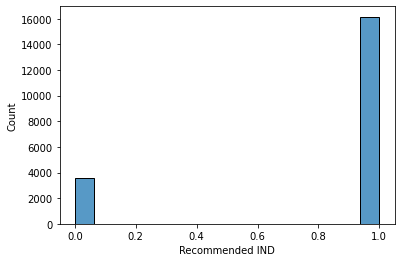

In [ ]:
sns.histplot(x='Recommended IND', data=df)

### Recommendation by Department

Text(0.5, 1.0, 'recommendation by department')

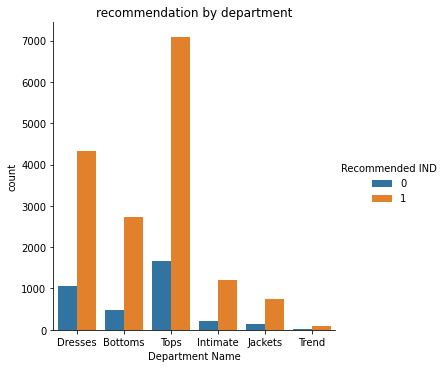

In [ ]:
sns.catplot(x='Department Name',hue='Recommended IND',data=df, kind='count')
plt.title('recommendation by department', fontsize=12)

* Tops department recieves the most recommendation and non-recommendation from customers.
* Dresses department recieves the second most recommendation and non-recommendation from customers.
* Trend departemnt recieves the least recommendation and non-recommendation from customers.

### Recommendation by Age

Text(0.5, 1.0, 'recommendation by age')

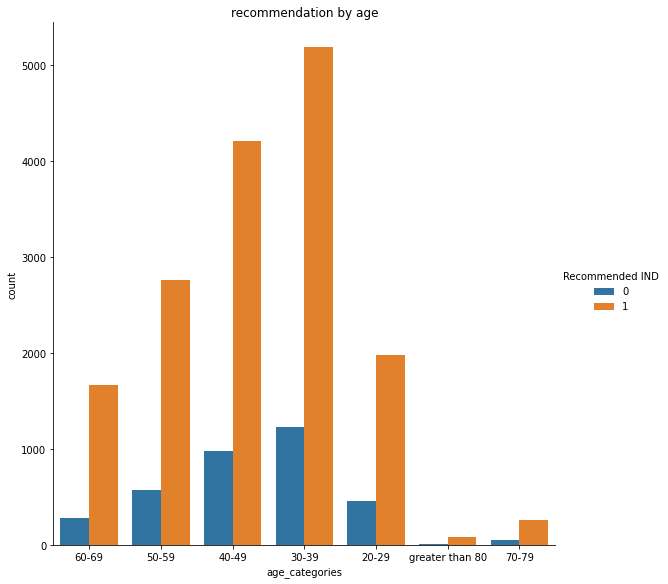

In [ ]:
sns.catplot(x='age_categories',hue='Recommended IND',data=df, kind='count',height=8)
plt.title('recommendation by age', fontsize=12)

* People in their 30's and 40's left the most purchase recommendation and non-recommendation
* People in their 70's and their 80's left the lest purchase recommendation and non-recommendation

Text(0.5, 1.0, 'recommendation by rating')

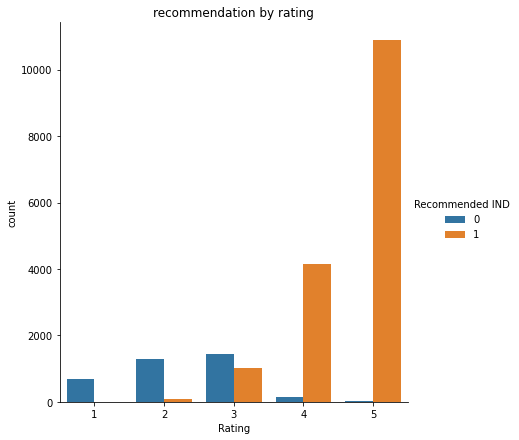

In [ ]:
sns.catplot(x='Rating',hue='Recommended IND',data=df, kind='count',height=6)
plt.title('recommendation by rating', fontsize=12)

Customers who give a 5-star rating to products tend to give a purchase recommendation

### when customers would recommend the company products, what are the most frequent words from the reviews?

In [ ]:
df.head(2)

Clothing ID  Age             Title Review  \
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   

                                              Review  Rating  Recommended IND  \
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
2                        0         General         Dresses    Dresses  ...   
3                        0  General Petite         Bottoms      Pants  ...   

                    title_token  \
2  [Some, major, design, flaws]   
3           [My, favorite, buy]   

                                        review_token             title_string  \
2  [high, hopes, dress, really, wanted, work, me,...  Some major design flaws   
3  [love, love, love, jumpsuit, fun, flirty, fabu...             favorite buy   

                                       review_string frequent_title_string  \
2  high hopes dress really wanted work initially ...     Some major design   
3  love love love jumpsuit fun flirty fabulous ev...          favorite buy   

                              frequent_review_string   title_string_lem  \
2  high hopes dress really wanted work ordered pe...  Some major design   
3  love love love jumpsuit fun flirty fabulous ev...       favorite buy   

                                   review_string_lem is_title_equal  \
2  high hopes dress really wanted work ordered pe...           True   
3  love love love jumpsuit fun flirty fabulous ev...           True   

   is_review_equal  
2             True  
3             True  

[2 rows x 21 columns]

In [ ]:
recommend = df[df['Recommended IND'] == 1]
not_recommend = df[df['Recommended IND'] == 0]

#### recommendation

(-0.5, 599.5, 399.5, -0.5)

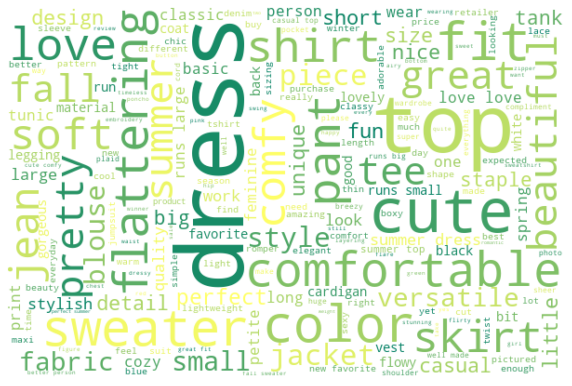

In [ ]:
# create a list of all word
all_word_recommend_1 =  ' '.join([word for word in recommend['title_string_lem']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white",colormap='summer').generate(all_word_recommend_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#### non-recommendation

(-0.5, 599.5, 399.5, -0.5)

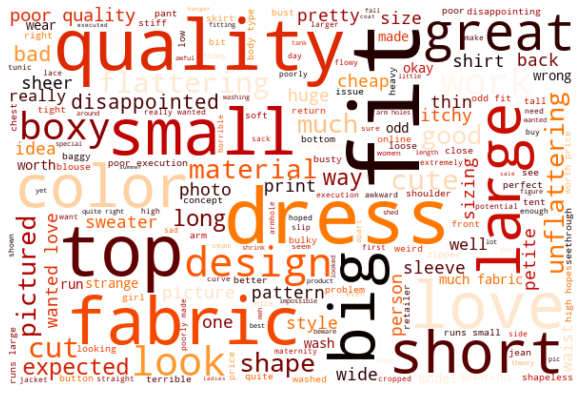

In [ ]:
all_word_non_recommend =  ' '.join([word for word in not_recommend['title_string_lem']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color="white",colormap='gist_heat').generate(all_word_non_recommend)
plt.figure(figsize=(13, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# VADER Sentiment Scoring on Review
VADER - Valence Aware Dictionay and Sentiment Reasoner

It takes all the words in sentence and it has a value of either positive or negative or neutral for each of those words. 
 1. Remove stop words 
 2. each word is scored and combined to total score

Note: Vader model wouldn't pick up on the relationship between words in sentence. It means it don't pick up on the context 

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
# example
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

* neg means negative = 0
* neu means neutral = 0.3
* pos means positive = 0.6
* compound = neg + neu + pos

the code tagged the sentence mostly positive

In [ ]:
sia.polarity_scores('I am disappointed')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

the code tagged the sentence mostly negative

### Only 1000 rows

In [ ]:
# testing on 1000 rows
text_df = df.head(1000)
text_df.head(2)

Clothing ID  Age             Title Review  \
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   

                                              Review  Rating  Recommended IND  \
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
2                        0         General         Dresses    Dresses  ...   
3                        0  General Petite         Bottoms      Pants  ...   

                    title_token  \
2  [Some, major, design, flaws]   
3           [My, favorite, buy]   

                                        review_token             title_string  \
2  [high, hopes, dress, really, wanted, work, me,...  Some major design flaws   
3  [love, love, love, jumpsuit, fun, flirty, fabu...             favorite buy   

                                       review_string frequent_title_string  \
2  high hopes dress really wanted work initially ...     Some major design   
3  love love love jumpsuit fun flirty fabulous ev...          favorite buy   

                              frequent_review_string   title_string_lem  \
2  high hopes dress really wanted work ordered pe...  Some major design   
3  love love love jumpsuit fun flirty fabulous ev...       favorite buy   

                                   review_string_lem is_title_equal  \
2  high hopes dress really wanted work ordered pe...           True   
3  love love love jumpsuit fun flirty fabulous ev...           True   

   is_review_equal  
2             True  
3             True  

[2 rows x 21 columns]

In [ ]:
from numpy.core.fromnumeric import reshape
# run the polarity socre on the dataset by creating loop
# for i,row in 
res ={}
for i, row in tqdm(text_df.iterrows(), total=len(text_df)): 
  review_text = row['review_string_lem']
  product_Id = row['Clothing ID']
  res[product_Id] = sia.polarity_scores(review_text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# dictionary of each clothing ID 
vader_result = pd.DataFrame(res).T #.T flip the dataframe
vader_result

neg    neu    pos  compound
1077  0.085  0.738  0.177    0.5209
1049  0.000  0.261  0.739    0.9628
847   0.000  0.594  0.406    0.9612
1080  0.000  0.479  0.521    0.9618
858   0.053  0.785  0.162    0.5709
...     ...    ...    ...       ...
235   0.180  0.593  0.227    0.4215
1204  0.000  0.336  0.664    0.8720
720   0.000  0.663  0.337    0.9501
1028  0.096  0.578  0.325    0.8971
940   0.000  0.451  0.549    0.9246

[159 rows x 4 columns]

In [ ]:
vader_result = vader_result.reset_index().rename(columns={'index':'Clothing ID',
                                           'neg':'negative',
                                           'neu':'neutral',
                                           'pos':'positive'})

In [ ]:
vader_result.dtypes

Clothing ID      int64
negative       float64
neutral        float64
positive       float64
compound       float64
dtype: object

In [ ]:
# merge with review_df
# Sentiment score and metadata
vader = pd.merge(vader_result, df, how='left')
vader.head()

Clothing ID  negative  neutral  positive  compound  Age  \
0         1077     0.085    0.738     0.177    0.5209   60   
1         1077     0.085    0.738     0.177    0.5209   24   
2         1077     0.085    0.738     0.177    0.5209   34   
3         1077     0.085    0.738     0.177    0.5209   53   
4         1077     0.085    0.738     0.177    0.5209   50   

                           Title Review  \
0               Some major design flaws   
1                            Flattering   
2                        Such fun dress   
3  Dress looks like made cheap material   
4             Pretty party dress issues   

                                              Review  Rating  Recommended IND  \
0  high hopes dress really wanted work me initial...       3                0   
1  love dress usually get xs runs little snug bus...       5                1   
2  im 55 125 lbs ordered petite make sure length ...       5                1   
3  dress runs small esp zipper area runs ordered ...       3                0   
4  nice choice holiday gatherings like length gra...       3                1   

   ...                                  title_token  \
0  ...                 [Some, major, design, flaws]   
1  ...                                 [Flattering]   
2  ...                           [Such, fun, dress]   
3  ...  [Dress, looks, like, made, cheap, material]   
4  ...               [Pretty, party, dress, issues]   

                                        review_token  \
0  [high, hopes, dress, really, wanted, work, me,...   
1  [love, dress, usually, get, xs, runs, little, ...   
2  [im, 55, 125, lbs, ordered, petite, make, sure...   
3  [dress, runs, small, esp, zipper, area, runs, ...   
4  [nice, choice, holiday, gatherings, like, leng...   

                           title_string  \
0               Some major design flaws   
1                            Flattering   
2                        Such fun dress   
3  Dress looks like made cheap material   
4             Pretty party dress issues   

                                       review_string  \
0  high hopes dress really wanted work initially ...   
1  love dress usually get runs little snug bust o...   
2  125 lbs ordered petite make sure length long t...   
3  dress runs small esp zipper area runs ordered ...   
4  nice choice holiday gatherings like length gra...   

            frequent_title_string  \
0               Some major design   
1                                   
2                       fun dress   
3  looks like made cheap material   
4              party dress issues   

                              frequent_review_string  \
0  high hopes dress really wanted work ordered pe...   
1  love dress usually get runs little snug bust o...   
2  lbs ordered petite make sure length long typic...   
3  dress runs small esp zipper area runs ordered ...   
4  nice choice holiday like length knee enough of...   

                 title_string_lem  \
0               Some major design   
1                                   
2                       fun dress   
3  looks like made cheap material   
4              party dress issues   

                                   review_string_lem is_title_equal  \
0  high hopes dress really wanted work ordered pe...           True   
1  love dress usually get runs little snug bust o...           True   
2  lbs ordered petite make sure length long typic...           True   
3  dress runs small esp zipper area runs ordered ...           True   
4  nice choice holiday like length knee enough of...           True   

  is_review_equal  
0            True  
1            True  
2            True  
3            True  
4            True  

[5 rows x 25 columns]

In [ ]:
vader[['negative','neutral','positive','compound','Rating','Recommended IND']]

negative  neutral  positive  compound  Rating  Recommended IND
0         0.085    0.738     0.177    0.5209       3                0
1         0.085    0.738     0.177    0.5209       5                1
2         0.085    0.738     0.177    0.5209       5                1
3         0.085    0.738     0.177    0.5209       3                0
4         0.085    0.738     0.177    0.5209       3                1
...         ...      ...       ...       ...     ...              ...
13528     0.000    0.451     0.549    0.9246       5                1
13529     0.000    0.451     0.549    0.9246       5                1
13530     0.000    0.451     0.549    0.9246       5                1
13531     0.000    0.451     0.549    0.9246       4                1
13532     0.000    0.451     0.549    0.9246       3                0

[13533 rows x 6 columns]

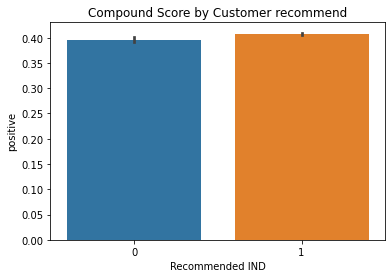

In [ ]:
ax = sns.barplot(data=vader, x='Recommended IND',y='positive')
ax.set_title('Compound Score by Customer recommend')
plt.show()

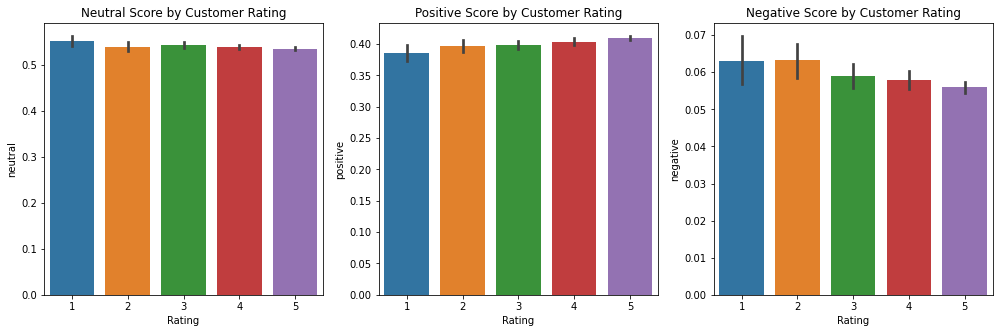

In [ ]:
# plot each sentiment scores for each rating star
gig, axs = plt.subplots(1,3,figsize=(17,5))
sns.barplot(data=vader, x='Rating',y='neutral', ax=axs[0])
axs[0].set_title('Neutral Score by Customer Rating')

sns.barplot(data=vader, x='Rating',y='positive', ax=axs[1])
axs[1].set_title('Positive Score by Customer Rating')

sns.barplot(data=vader, x='Rating',y='negative', ax=axs[2])
axs[2].set_title('Negative Score by Customer Rating')

plt.show()

- Positivy and the Neutral kind of flat 

- There isn't much difference between ranking scores and positive scores. So I have the hypothesis that even if the positive scores are high, the customers would rank low

- The negative scores are high as the ranking scores are equal to 1. However, Customer ranking scores equal to 3, 4, and 5 also have high negative scores than the ranking score equal to 2. So I have the hypothesis that even if the negative scores are high, the customers would rank high

Or maybe the Sentiment Score are not relate to the actual Ranking Scores


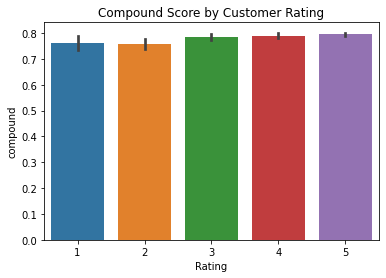

In [ ]:
ax = sns.barplot(data=vader, x='Rating',y='compound')
ax.set_title('Compound Score by Customer Rating')
plt.show()

In [ ]:
vader[['negative','neutral','positive','compound','Rating','Recommended IND']].corr()

negative   neutral  positive  compound    Rating  \
negative         1.000000 -0.016542 -0.437879 -0.486780 -0.032907   
neutral         -0.016542  1.000000 -0.891667 -0.507786 -0.027459   
positive        -0.437879 -0.891667  1.000000  0.676954  0.039581   
compound        -0.486780 -0.507786  0.676954  1.000000  0.041741   
Rating          -0.032907 -0.027459  0.039581  0.041741  1.000000   
Recommended IND -0.026247 -0.019824  0.029706  0.035982  0.793473   

                 Recommended IND  
negative               -0.026247  
neutral                -0.019824  
positive                0.029706  
compound                0.035982  
Rating                  0.793473  
Recommended IND         1.000000

There is no correlation between Sentiment scores and Ranking score

In [ ]:
vader.columns

Index(['Clothing ID', 'negative', 'neutral', 'positive', 'compound', 'Age',
       'Title Review', 'Review', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'age_categories', 'title_token', 'review_token',
       'title_string', 'review_string', 'frequent_title_string',
       'frequent_review_string', 'title_string_lem', 'review_string_lem',
       'is_title_equal', 'is_review_equal'],
      dtype='object')

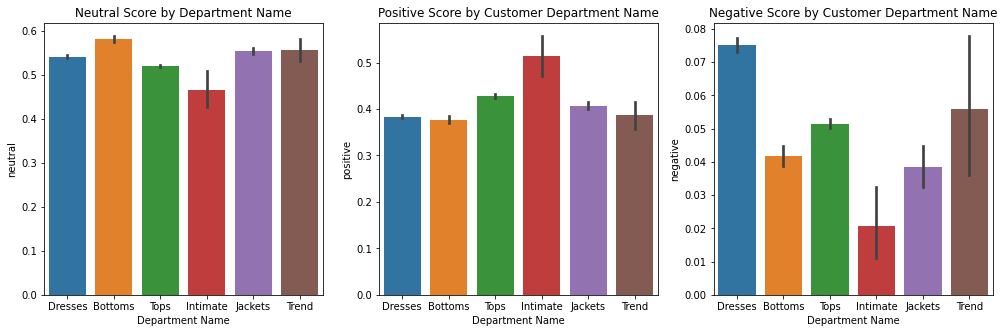

In [ ]:
# plot each sentiment scores for department
gig, axs = plt.subplots(1,3,figsize=(17,5))
sns.barplot(data=vader, x='Department Name',y='neutral', ax=axs[0])
axs[0].set_title('Neutral Score by Department Name')

sns.barplot(data=vader, x='Department Name',y='positive', ax=axs[1])
axs[1].set_title('Positive Score by Customer Department Name')

sns.barplot(data=vader, x='Department Name',y='negative', ax=axs[2])
axs[2].set_title('Negative Score by Customer Department Name')

plt.show()

# Decision Tree: Predicting recommendation from the dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor


from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.head(2)

Clothing ID  Age             Title Review  \
2         1077   60  Some major design flaws   
3         1049   50          My favorite buy   

                                              Review  Rating  Recommended IND  \
2  high hopes dress really wanted work me initial...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
2                        0         General         Dresses    Dresses  ...   
3                        0  General Petite         Bottoms      Pants  ...   

                    title_token  \
2  [Some, major, design, flaws]   
3           [My, favorite, buy]   

                                        review_token             title_string  \
2  [high, hopes, dress, really, wanted, work, me,...  Some major design flaws   
3  [love, love, love, jumpsuit, fun, flirty, fabu...             favorite buy   

                                       review_string frequent_title_string  \
2  high hopes dress really wanted work initially ...     Some major design   
3  love love love jumpsuit fun flirty fabulous ev...          favorite buy   

                              frequent_review_string   title_string_lem  \
2  high hopes dress really wanted work ordered pe...  Some major design   
3  love love love jumpsuit fun flirty fabulous ev...       favorite buy   

                                   review_string_lem is_title_equal  \
2  high hopes dress really wanted work ordered pe...           True   
3  love love love jumpsuit fun flirty fabulous ev...           True   

   is_review_equal  
2             True  
3             True  

[2 rows x 21 columns]

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Title Review', 'Review', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'age_categories', 'title_token',
       'review_token', 'title_string', 'review_string',
       'frequent_title_string', 'frequent_review_string', 'title_string_lem',
       'review_string_lem'],
      dtype='object')

In [ ]:
# drop columns
df = df.drop(columns=['is_title_equal','is_review_equal'])

In [ ]:
df = df.drop(columns=['title_token','review_token'])

In [ ]:
# checking correlation between columns in the dataset
corr_matrix = df.drop(columns=['Recommended IND'])._get_numeric_data().sample(frac=0.25).corr()
corr_matrix

Clothing ID       Age    Rating  \
Clothing ID                 1.000000  0.019624 -0.012282   
Age                         0.019624  1.000000  0.053764   
Rating                     -0.012282  0.053764  1.000000   
Positive Feedback Count     0.040354  0.035184 -0.045447   

                         Positive Feedback Count  
Clothing ID                             0.040354  
Age                                     0.035184  
Rating                                 -0.045447  
Positive Feedback Count                 1.000000

## Feature Scaling

### Scale the numerical features

In [ ]:
# feature Scaling
X = df.drop(columns=['Recommended IND']).select_dtypes(include='number').columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[X])
df[X] = scaled_df
df.describe()

Clothing ID           Age        Rating  Recommended IND  \
count  19741.000000  19741.000000  19741.000000     19741.000000   
mean       0.763999      0.311901      0.795894         0.818348   
std        0.166825      0.151321      0.277905         0.385568   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.714286      0.197531      0.750000         1.000000   
50%        0.776578      0.283951      1.000000         1.000000   
75%        0.894518      0.419753      1.000000         1.000000   
max        1.000000      1.000000      1.000000         1.000000   

       Positive Feedback Count  
count             19741.000000  
mean                  0.021718  
std                   0.047773  
min                   0.000000  
25%                   0.000000  
50%                   0.008197  
75%                   0.024590  
max                   1.000000

### Handling Categorical Variable

In [ ]:
df = pd.get_dummies(df)
df.head(2)

Clothing ID       Age  Rating  Recommended IND  Positive Feedback Count  \
2     0.893688  0.518519     0.5                0                      0.0   
3     0.870432  0.395062     1.0                1                      0.0   

   Title Review_ Psehis top interesting white rather plain sheer tried usual size small fit well 58 135 lbs 32d  \
2                                                  0                                                              
3                                                  0                                                              

   Title Review_ love blouse  Title Review_ me  Title Review_ print  \
2                          0                 0                    0   
3                          0                 0                    0   

   Title Review_ terrible fit  ...  \
2                           0  ...   
3                           0  ...   

   review_string_lem_yes top runs large show curves still really cute fun wear first purchased beautiful color getting compliments also ordered navy version tops easy wear interesting detail neck could cozy comfortable stylish love mine  \
2                                                  0                                                                                                                                                                                           
3                                                  0                                                                                                                                                                                           

   review_string_lem_yes true red red orange red classic shade red pants comfortable right amount stretch nice weight springsummer without light flimsy like better say fit tts slightly large side reference waist hips size fits well big also take slightly  \
2                                                  0                                                                                                                                                                                                             
3                                                  0                                                                                                                                                                                                             

   review_string_lem_yes true top part sleeves snug little especially work out overall found top run true regular size tried try bigger length great short think need petite usually pants tops off look shirt also classic flowy looked great half tuck embroidery also nice though one part seemed loose  \
2                                                  0                                                                                                                                                                                                                                                         
3                                                  0                                                                                                                                                                                                                                                         

   review_string_lem_yet jumpsuit time jumpsuit absolutely stunning classy elegant stand piece purchased full price hard time quite tall usually look like jumpsuit made feel beautiful put graceful recommend enough fit true size purchased short crotch almost 510 form fitting still bit  \
2                                                  0                                                                                                                                                                                                                                           
3                                                  0                                                              

## Train-Test Split
Split train-test with the ratio 70-30.

In [ ]:
test_size_ratio = 0.3

X = df.drop(columns=['Recommended IND'])._get_numeric_data().columns
Y = df['Recommended IND']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[X],Y,test_size=test_size_ratio,random_state=42)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (13818, 118680)
y_train.shape: (13818,)
X_test.shape: (5923, 118680)
y_test.shape: (5923,)


In [ ]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Predict & Test

In [ ]:
y_predict = tree_model.predict(X_test)
print(y_predict [0:5])
print(y_test [0:5])

[1 1 1 1 1]
8211     1
11829    1
6092     1
23240    1
22956    1
Name: Recommended IND, dtype: int64


Evaluate the predictions

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('DecisionTree Accuracy:', metrics.accuracy_score(y_test,y_predict))

DecisionTree Accuracy: 0.9240249873374979


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predict))

0.9240249873374979


In [ ]:
tree_1 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split = 5)
tree_1 = tree_1.fit(X_train, y_train)
y_predict = tree_1.predict(X_test)
print(accuracy_score(y_test, y_predict))

fig = plt.figure(figsize=(50,50), dpi=300)
_ = tree.plot_tree(tree_1, 
                   feature_names=X,
                   class_names={0:'No',1:'Yes'},
                   filled=True)

0.9339861556643593


In [ ]:
## Adjust some hyperparameters of the decision tree classifier (max_depth, min_sample_split) to improve the performance further. 
tree_1 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 5)
tree_1 = tree_1.fit(X_train, y_train)
y_predict = tree_1.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.9339861556643593


In [ ]:
fig = plt.figure(figsize=(30,30), dpi=500)
_ = tree.plot_tree(tree_1, 
                   feature_names=X,
                   class_names={0:'No',1:'Yes'},
                   filled=True)

# CONCLUSION

The key takeaways from the above analysis of this dataset are:

* In each department the dominant rating given is 5 stars, the Tops has the highest number of 5 stars within its department. Consumers seem to give fewer 5 stars reviews and give more 1 star review on Intimate 

* People in their 30’s left the most reviews, this is probably the target audience of this shop , followed by people in their 40’s and 50’s. The 70-79 and greater then 80 age groups, however, left the least review. The Tops received the most reviews in the age groups. The second highest are dresses and bottoms. This gives companies an idea for who the target demographic is and for what kind of clothing types (tops, dresses) are in demand. 
* The compancy can focus on 30's age group in its online advertising because these customers seem to be more interested in the company products. Therefore, the conversion rate of that marketing campaign might be higher. 


Positive review
 * key features of the clothes which customers liked are dresses and top. 
 * the quality/material of the clothes.. How soft and comfortable the clothes are.. The fabric and color etc. 


Negative review

* In the negative reviews, clients talk mostly about dresses and tops. The company should inspect why they have so much negative feedback about these product groups. Sometimes it might just mean that these products are the most popular. That's why there are a lot of reviews both positive and negative.
* the most common complaint revolves around the size and fitting of the clothes. Sometimes it's too big, sometimes it's too small. From this information, I believe that the problems occur because online retailers do not have  changing rooms therefore customers do not have a chance to try clothes. he company can take a close look at the size of their clothes and maybe add more information about it on the website. 

* Customers have the problem with Color too - sometimes clothes on pictures can have different color than they actually do. The company should explore this issue further and make sure that they display colors correctly. Quality of the pictures is crutial for the online clothing retailers 
* They also mentioned  fabric and material which should be evaluated and improved if possible. 